# Data Analytics Coursework: Group C - Code

### Requirements for running the notebook

Please have the following files in the same directory as the notebook:
- fathead_minnow_dataset.csv
- mordred_descriptors.csv
- morgan_fingerprints.csv
- rdkit_descriptors.csv

### Notebook Contents:
    
1. Multilinear Regression Analysis & SVMs
2. Random Forests
3. Dimensionality Reduction & Clustering
4. Artificial Neural Networks (ANNs)
5. Graph Convolutional Neural Networks (GCNNs)

# Section 1: Multilinear Regression Analysis & SVMs

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LinearRegression,Lasso 

## RDKit descriptors

## 1. Normal linear regression for feature selection (RDKit)

In [92]:
df_toxicity = pd.read_csv('./fathead_minnow_dataset.csv')   #create dataframe for the toxicity dataset
df_rdkit = pd.read_csv('./rdkit_descriptors.csv')      #create dataframe for the rdkit dataset
df_rdkit['pLC50'] = df_toxicity['pLC50']   #add the pLC column to the rdkit dataframe
df_rdkit = df_rdkit.drop(df_rdkit.columns[0],axis=1)    # drop the first two columns of the rdkit dataframe that are not features
df_rdkit = df_rdkit.drop(df_rdkit.columns[0],axis=1)
X = df_rdkit.drop('pLC50', axis=1)  #create X and y dataframe separately for model training
y = df_rdkit['pLC50']

In [93]:
X

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,7.593750,0.000000,7.593750,0.000000,0.411164,66.063,64.047,66.021798,24,0,...,0,0,0,0,0,0,0,0,0,0
1,4.944444,0.777778,4.944444,0.777778,0.415749,88.106,80.042,88.052429,36,0,...,0,0,0,0,0,0,0,0,0,0
2,4.944444,1.500000,4.944444,1.500000,0.299219,60.100,52.036,60.068748,26,0,...,0,0,0,0,0,0,0,0,0,0
3,11.652689,-0.565463,11.652689,0.080156,0.617037,214.220,204.140,214.062994,80,0,...,0,0,0,0,0,0,0,0,0,0
4,5.217207,0.684028,5.217207,0.684028,0.479095,112.987,106.939,111.984656,32,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2.241065,1.244722,2.241065,1.244722,0.573822,148.249,132.121,148.125201,60,0,...,0,0,0,0,0,0,0,0,1,0
550,10.274032,0.718148,10.274032,0.718148,0.594673,149.193,138.105,149.084064,58,0,...,0,0,0,0,0,0,0,0,0,0
551,5.647557,0.573704,5.647557,0.573704,0.771297,199.253,186.149,199.099714,76,0,...,0,0,0,0,0,0,0,0,0,0
552,2.222269,0.766111,2.222269,0.766111,0.566681,150.312,136.200,150.053692,50,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y

0      0.251812
1     -4.012837
2     -0.894870
3     -0.071882
4     -2.045323
         ...   
549   -0.232996
550   -1.659916
551   -0.960946
552   -0.919601
553   -1.397940
Name: pLC50, Length: 554, dtype: float64

In [95]:
# perform train/test split

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=101)  

In [96]:
#  perform standardisation for both X_train and X_test datasets
 
scaler = StandardScaler()      
X1_train_sd = scaler.fit_transform(X1_train)
X1_train_df = pd.DataFrame(X1_train_sd, columns = X1_train.columns)
X1_test_sd = scaler.transform(X1_test)
X1_test_df = pd.DataFrame(X1_test_sd, columns = X1_test.columns)


In [99]:
#train with simple linear regression model

model = LinearRegression()
model.fit(X1_train_df,y1_train)

LinearRegression()

In [100]:
y1_pred = model.predict(X1_test_df)    # obtain the y prediction data
y1_pred

array([-2.15883352e+00, -1.15605488e+00,  5.70305124e-01, -2.30617721e+00,
       -4.15147106e-01, -2.92139521e+00, -2.01698335e+00, -9.70652224e-01,
       -1.78876939e+00, -3.00323437e+00, -5.17768408e-01, -2.00376175e+00,
       -3.68937072e-01, -2.73890457e+00, -7.59930723e-01, -3.61338316e+00,
       -1.14919429e+00, -1.34417546e+00, -1.28529368e+00, -2.65765026e+00,
       -1.56040684e+00, -1.00081612e+00, -4.13236775e-01, -3.08226028e+00,
       -2.33719600e+00, -1.65277866e+00, -7.40593431e-01, -8.85052860e-01,
        1.55008527e-01, -4.66687950e+01, -5.36350271e-01, -1.27314327e+00,
       -1.96273129e+00, -3.32142244e+00, -2.46612881e+00,  1.00668314e+00,
       -1.62439989e+00,  1.34148387e+00, -7.64792631e+00,  2.11324958e-01,
       -1.61586818e-01, -1.76447096e+00, -1.93907843e+00,  1.46614951e-01,
       -1.62718737e+00, -1.52713528e+00, -5.69688863e-01, -2.26869122e+00,
       -2.35397783e+00, -1.99014201e+00, -1.61475815e+00, -3.20083802e+00,
       -2.04144112e+00, -

In [101]:
from sklearn.metrics import mean_absolute_error,mean_squared_error     # obtain the model performace metrics
MAE = mean_absolute_error(y1_pred,y1_test)
MSE = mean_squared_error(y1_pred,y1_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

2.017551769658728
100.53789971011041
10.026858915438593


In [102]:
model.coef_     # obtain the coefficients for all features

array([-1.08040093e-01, -6.79638649e-01, -1.08040094e-01,  8.14049185e-02,
        4.63781194e-02,  4.85221881e+02, -7.92598976e+02,  2.66977449e+02,
       -2.79226064e+02,  2.58801995e-10, -1.10930495e+00,  9.16702961e-01,
        1.13717246e+00,  9.15804831e-01, -6.93749043e-02,  3.50544333e-01,
       -3.07847069e-01,  1.40573361e-01, -2.15970596e-01,  1.95857994e-01,
       -4.35867638e-01, -5.88662037e-01,  5.16966508e-01, -2.54456867e-02,
        1.78531551e-01, -3.32986760e-01,  9.02602359e-01, -3.31467687e+02,
       -1.83170465e+01,  1.85494857e+02, -4.97468228e+00,  1.59661893e+01,
        5.63561196e+00,  4.75750655e+00,  5.16844765e-01,  4.99444817e-01,
        7.95287680e-01, -3.00800743e-01,  5.43317047e-01, -2.75752891e+00,
        6.19389723e-02,  6.59379901e+00,  7.42227660e-02, -5.45312307e-02,
        7.11832885e+02, -4.63414195e+01, -3.35058689e+01, -2.47583875e+01,
       -1.23890540e+01, -1.34190554e+01, -1.89989094e+01, -4.72856917e+01,
       -2.85450818e+01, -

In [103]:
# obtain and rank top10 feature coefficients (importance) in ascending order
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_descending = coeff_df.sort_values('Coefficient', ascending=[0])
coeff_descending.head(10)

,Coefficient
LabuteASA,711.832885
MolWt,485.221881
ExactMolWt,266.977449
VSA_EState1,191.815714
Chi0v,185.494857
VSA_EState2,154.026089
VSA_EState3,143.141068
VSA_EState6,119.363107
VSA_EState10,117.465251
HeavyAtomCount,78.538236


## 2. Lasso linear regression for feature selection (RDKit)

In [170]:
# perform train_test split

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y,random_state=101)   

In [171]:
#  perform standardisation for both X_train and X_test datasets
 
scaler = StandardScaler()      
X2_train_sd = scaler.fit_transform(X2_train)
X2_train_df = pd.DataFrame(X2_train_sd, columns = X2_train.columns)
X2_test_sd = scaler.transform(X2_test)
X2_test_df = pd.DataFrame(X2_test_sd, columns = X2_test.columns)


In [172]:
# using GridSearch to find the optimal alpha value for Lasso regression

parameters = {'alpha':[0.01,0.05,0.1,1,10,100]} 
model_Lasso_1 = Lasso()
Lasso_reg_1= GridSearchCV(model_Lasso_1, parameters, scoring='neg_mean_squared_error',cv=5)

In [173]:

Lasso_reg_1.fit(X2_train_df,y2_train)
print(Lasso_reg_1.best_estimator_)     #found the optimal alpha value

Lasso(alpha=0.01)


In [174]:
best_Lassomodel_1 = Lasso_reg_1.best_estimator_
best_Lassomodel_1.fit(X2_train_df,y2_train)      #train with the optimised Lasso model

Lasso(alpha=0.01)

In [175]:
y2_pred = best_Lassomodel_1.predict(X2_test_df)    # obtain the y prediction data
y2_pred

array([-2.03985764e+00, -1.19954130e+00,  3.60641226e-01, -2.20400258e+00,
       -3.16499294e-01, -2.16774533e+00, -1.52617662e+00, -1.13621934e+00,
       -1.58188330e+00, -3.03666345e+00, -5.99274010e-01, -1.25053189e+00,
       -7.07158028e-01, -1.93707607e+00, -1.40166511e+00, -3.05553628e+00,
       -1.00335825e+00, -1.81604520e+00, -1.53926468e+00, -2.46717640e+00,
       -1.33647189e+00, -3.58763230e-01, -7.24808491e-01, -2.31031141e+00,
       -1.94630581e+00, -1.44954897e+00, -1.24976967e+00, -2.22642216e-01,
       -3.63491148e-01, -1.69684825e+00, -5.36041927e-01, -1.29874925e+00,
       -2.22152388e+00, -2.32278819e+00, -1.55709807e+00,  3.82088421e-01,
       -1.13819063e+00, -1.56183663e+00, -4.99638780e+00,  2.54519381e-01,
       -8.86678549e-01, -1.86815837e+00, -2.66987389e+00, -1.85688635e-01,
       -1.62927410e+00, -1.40368271e+00, -3.65669951e-01, -1.59778844e+00,
       -2.11525666e+00, -1.65597766e+00, -1.25619600e+00, -3.17227479e+00,
       -3.56980629e+00, -

In [176]:
from sklearn.metrics import mean_absolute_error,mean_squared_error    # obtain the model performace metrics
MAE = mean_absolute_error(y2_pred,y2_test)
MSE = mean_squared_error(y2_pred,y2_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.5525709397660992
0.7444181765706843
0.8627967179878956


In [177]:
best_Lassomodel_1.coef_     # obtain the coefficients for all features

array([-3.06916921e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -5.39282675e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.10719230e-02,  4.09556418e-03,
        0.00000000e+00,  4.25328987e-02, -1.23471707e-01, -5.51955590e-03,
        1.15331160e-01, -8.22935437e-02,  0.00000000e+00,  0.00000000e+00,
        1.88653973e-02, -2.64376745e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        8.51400221e-02,  0.00000000e+00,  2.27495151e-01, -2.94424941e-02,
        0.00000000e+00, -1.23267868e-01,  1.48587683e-01,  3.22394528e-02,
       -6.20464148e-02,  2.24586684e-02,  5.72832514e-02,  0.00000000e+00,
        2.09802547e-02, -

In [178]:
# obtain and rank top10 feature coefficients (importance) in ascending order
coeff_df = pd.DataFrame(best_Lassomodel_1.coef_,X.columns,columns=['Coefficient'])
coeff_descending = coeff_df.sort_values('Coefficient', ascending=[0])
coeff_descending.head(10)

,Coefficient
MolLogP,0.551484
PEOE_VSA6,0.303311
Kappa2,0.227495
VSA_EState9,0.161128
PEOE_VSA5,0.151984
fr_ester,0.150622
PEOE_VSA10,0.148588
fr_aldehyde,0.135750
VSA_EState4,0.133217
BCUT2D_CHGLO,0.115331


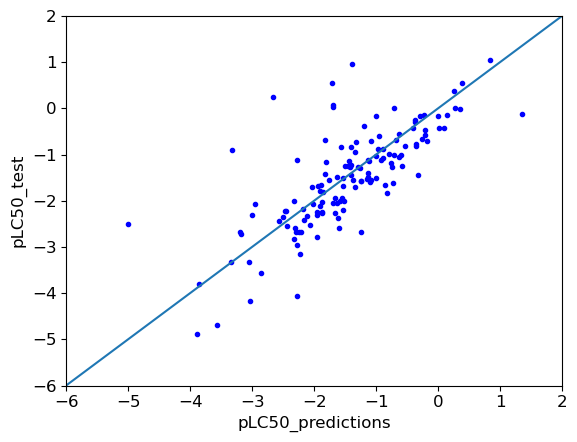

In [242]:
plt.plot(y2_pred,y2_test, 'b.')
plt.xlabel('pLC50_predictions', fontsize = 12)
plt.ylabel('pLC50_test', rotation = 'vertical', fontsize = 12)
plt.axis([-6, 2, -6,2])
ident = [-6, 2]
plt.plot(ident,ident)
plt.show()

## 3. Support Vector Machine trained with full dataset (RDKit)

In [208]:
# Creating dataframe for toxicity and rdkit dataset

df1 = pd.read_csv('./fathead_minnow_dataset.csv')
df2 = pd.read_csv('./rdkit_descriptors.csv')


In [213]:
LC50 = df1['LC50_(mg/L)'].tolist()
LC50_binary_list = []

for value in LC50:
    if value > 0.5:
        LC50_binary_list.append(0) # not high toxicity
    elif value <= 0.5:
        LC50_binary_list.append(1)
LC50_binary = np.array(LC50_binary_list)

df_LC50_binary = pd.DataFrame(LC50_binary, columns = ['LC50_binary'])
df_LC50_binary


,LC50_binary
0,0
1,0
2,0
3,0
4,0
...,...
549,0
550,0
551,0
552,0


In [214]:
# Create X (all features) and y (binary toxicity) dataframe

df2['LC50_binary'] = df_LC50_binary['LC50_binary']
df2 = df2.drop(df2.columns[0],axis=1)
df2 = df2.drop(df2.columns[0],axis=1)
X = df2.drop('LC50_binary', axis=1)
y = df2['LC50_binary']


In [223]:
# build the SVM model


np.random.seed(42)
seed = 42 # Manually set the seed value as it is needed for the kfold set up


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) #  5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X, y): # this loop sets a new test/train split for each iteration in the loop

    # using GridSearch to find the optimal parameters for the SVM model
    param_grid = {'C':[0.5,1],
             'kernel':['rbf','poly'],
              'gamma':['scale'],
              'degree':[3,4]}
    grid = GridSearchCV(svm.SVC(),param_grid)  
    
    grid.fit(X.iloc[train],y[train])
    
    y_pred = grid.predict(X.iloc[test])   #Prediction for test dataset
    
    print ("Best parameters:",grid.best_params_)
    
    print("Accuracy:",metrics.accuracy_score(y[test], y_pred)*100)
    
    cvscores.append(metrics.accuracy_score(y[test], y_pred)*100)    
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))   # obtain average accuracy(and SD) of 5 runs 


Best parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 92.7927927927928
Best parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 91.8918918918919
Best parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 91.8918918918919
Best parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 91.8918918918919
Best parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 92.72727272727272
92.24% (+/- 0.43%)


## 4. Support Vector Machine trained with only top features from lasso regression analysis (RDKit)

In [229]:
# select top 5 features from regression feature selection for SVM model

X = df2[['MolLogP','PEOE_VSA6','Kappa2','VSA_EState9','PEOE_VSA5']]
X

,MolLogP,PEOE_VSA6,Kappa2,VSA_EState9,PEOE_VSA5
0,0.42366,0.000000,2.980000,0.000000,0.00000
1,0.03320,0.000000,2.157217,0.000000,0.00000
2,-0.57830,0.000000,1.262466,3.555556,0.00000
3,2.61140,30.331835,4.486277,0.000000,0.00000
4,1.85410,0.000000,4.580000,0.000000,23.20188
...,...,...,...,...,...
549,3.41930,50.097216,4.948674,0.000000,0.00000
550,1.56510,0.000000,3.191165,3.936343,0.00000
551,2.84780,36.398202,4.509118,0.000000,0.00000
552,3.18460,49.282745,4.566693,3.912037,0.00000


In [230]:
# build the SVM model


np.random.seed(42)
seed = 42 # Manually set the seed value as it is needed for the kfold set up


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) #  5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X, y): # this loop sets a new test/train split for each iteration in the loop

    # using GridSearch to find the optimal parameters for the SVM model
    param_grid = {'C':[0.5,1],
             'kernel':['rbf','poly'],
              'gamma':['scale'],
              'degree':[3,4]}
    grid = GridSearchCV(svm.SVC(),param_grid)  
    
    grid.fit(X.iloc[train],y[train])
    
    y_pred = grid.predict(X.iloc[test])   #Prediction for test dataset
    
    print ("Best parameters:",grid.best_params_)
    
    print("Accuracy:",metrics.accuracy_score(y[test], y_pred)*100)
    
    cvscores.append(metrics.accuracy_score(y[test], y_pred)*100)    
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))   # obtain average accuracy(and SD) of 5 runs 


Best parameters: {'C': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 93.69369369369369
Best parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 91.8918918918919
Best parameters: {'C': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 93.69369369369369
Best parameters: {'C': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 94.5945945945946
Best parameters: {'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 90.0
92.77% (+/- 1.64%)


## Mordred descriptors

## 5. Normal linear regression for feature selection (Mordred descriptors)

In [231]:
df_toxicity = pd.read_csv('./fathead_minnow_dataset.csv')   #create dataframe for the toxicity dataset
df_mordred = pd.read_csv('./mordred_descriptors.csv')    #create dataframe for the mordred descriptor dataset

In [316]:
df_mordred['pLC50'] = df_toxicity['pLC50']   #add the pLC column to the mordred dataframe
df_mordred = df_mordred.drop(df_mordred.columns[0],axis=1)    # drop the first two columns of the rdkit dataframe that are not features
df_mordred = df_mordred.drop(df_mordred.columns[0],axis=1)
X = df_mordred.drop('pLC50', axis=1)  #create X and y dataframe separately for model training
y = df_mordred['pLC50']

In [318]:
#  perform train/test split

X3_train, X3_test, y3_train, y3_test = train_test_split(X, y,test_size=0.2,random_state=101)   

#  perform standardisation for both X_train and X_test datasets
scaler = StandardScaler()      
X3_train_sd = scaler.fit_transform(X3_train)
X3_train_df = pd.DataFrame(X3_train_sd, columns = X3_train.columns)
X3_test_sd = scaler.transform(X3_test)
X3_test_df = pd.DataFrame(X3_test_sd, columns = X3_test.columns)


In [321]:
#train with the linear regression model
model = LinearRegression()
model.fit(X3_train_df,y3_train)

LinearRegression()

In [322]:
y3_pred = model.predict(X3_test_df)    # obtain the y prediction data
y3_pred

array([-1.26964229e+00, -2.83105194e+00, -2.06830561e-01, -2.48781291e+00,
        1.59288036e+00, -1.86790836e+00, -1.42952944e+00, -2.20858938e+00,
       -1.59631719e+00, -5.59083000e+00, -8.38001296e-01, -2.43820442e-01,
       -1.27510563e+00,  1.19187782e+00,  2.08023388e+00, -6.82661032e+00,
        7.56110523e-01, -7.40759973e-01, -1.99905857e+00, -1.88864359e+00,
       -1.03358587e+00, -1.08196131e+00, -9.78794852e-01, -3.24001796e+00,
       -3.64183566e+00, -1.43006652e+00, -1.08596152e+00, -7.16945794e-04,
        2.86756222e+00, -8.71618491e+00,  1.20533100e+00, -1.65882158e+00,
       -3.07555807e+00, -8.66949844e-02, -1.53083873e+00, -1.26966473e+00,
       -2.06746972e+00,  7.32014934e+00, -5.83993033e+00,  8.34152415e-02,
        2.44479613e+00, -3.14601902e+00, -3.39445148e+00,  4.70800201e+00,
       -2.52549976e+00, -1.07528997e+00, -1.87169329e-01, -2.58092498e+00,
       -3.28118973e+00, -3.86997253e+00,  1.39647207e+00, -1.58766248e+00,
        2.09533060e+01, -

In [323]:
from sklearn.metrics import mean_absolute_error,mean_squared_error     # obtain the model performace metrics
MAE = mean_absolute_error(y3_pred,y3_test)
MSE = mean_squared_error(y3_pred,y3_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

2.273536226161861
18.859759447189738
4.34278245450883


In [324]:
model.coef_     # obtain the coefficients for all features

array([-0.06884636, -0.19356893,  0.96399994, ...,  0.34316757,
        0.96715835,  0.064865  ])

In [325]:
# obtain and rank top10 feature coefficients (importance) in ascending order
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_descending = coeff_df.sort_values('Coefficient', ascending=[0])
coeff_descending.head(10)

,Coefficient
ATSC1d,6.906356
ECIndex,6.557386
Xp-3dv,5.811297
StCH,5.242047
TIC4,5.182145
SssssC,4.586009
BCUTZ-1h,4.567895
SssCH2,4.520070
VE1_A,4.450785
AATSC0dv,4.426824


## 6. Lasso linear regression for feature selection (Mordred descriptors)

In [290]:
# perform train_test split

X4_train, X4_test, y4_train, y4_test = train_test_split(X, y,test_size=0.2,random_state=101)   

In [291]:
#  perform standardisation for both X_train and X_test datasets
 
scaler = StandardScaler()      
X4_train_sd = scaler.fit_transform(X4_train)
X4_train_df = pd.DataFrame(X4_train_sd, columns = X4_train.columns)
X4_test_sd = scaler.transform(X4_test)
X4_test_df = pd.DataFrame(X4_test_sd, columns = X4_test.columns)

In [295]:
# using GridSearch to find the optimal alpha value for Lasso regression

parameters = {'alpha':[0.01,0.1,1,10]} 
model_Lasso_2 = Lasso()
Lasso_reg_2= GridSearchCV(model_Lasso_2, parameters, scoring='neg_mean_squared_error',cv=5)

In [296]:

Lasso_reg_2.fit(X4_train_df,y4_train)
print(Lasso_reg_1.best_estimator_)     #found the optimal alpha value

Lasso(alpha=0.01)


In [297]:
best_Lassomodel_2 = Lasso_reg_2.best_estimator_
best_Lassomodel_2.fit(X4_train_df,y4_train)      #train with the optimised Lasso model

Lasso(alpha=0.01)

In [298]:
y4_pred = best_Lassomodel_2.predict(X4_test_df)    # obtain the y prediction data
y4_pred

array([-2.27400725, -1.45712507,  0.21480931, -2.22941464, -0.5317483 ,
       -2.08604594, -1.76879297, -1.41877537, -1.83328263, -3.38716928,
       -0.52024491, -1.14359314, -0.23492055, -2.54714008, -1.02841938,
       -3.01046906, -1.09251202, -1.96654441, -1.59080574, -2.81920277,
       -1.46552142, -0.46541446, -1.10449885, -2.39610595, -2.14330142,
       -1.71327144, -1.1294758 , -0.34842012, -0.51963023, -1.06357574,
       -0.8926624 , -1.39524182, -2.36010898, -2.18764604, -1.73824476,
        1.04282261, -1.24583796, -2.14301644, -4.3732606 ,  0.1432367 ,
       -0.85557555, -1.83904858, -1.9805922 ,  0.00982766, -1.5920798 ,
       -1.42798186, -0.45088624, -1.58660877, -2.0073061 , -3.07414741,
       -1.40227563, -3.2423539 , -2.55808463, -3.79406076, -1.16401119,
       -4.09595764, -0.83897682, -0.31494167, -0.41709119, -1.54050392,
       -1.27890158, -2.48038006, -1.26679502, -1.96770706, -1.47733395,
       -0.85542859, -2.60474396, -1.87053446, -0.5053953 , -1.99

In [299]:
from sklearn.metrics import mean_absolute_error,mean_squared_error    # obtain the model performace metrics
MAE = mean_absolute_error(y2_pred,y2_test)
MSE = mean_squared_error(y2_pred,y2_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.5525709397660992
0.7444181765706843
0.8627967179878956


In [300]:
best_Lassomodel_2.coef_     # obtain the coefficients for all features

array([ 0.        ,  0.        , -0.12229056, ..., -0.        ,
        0.        ,  0.        ])

In [301]:
# obtain and rank top10 feature coefficients (importance) in ascending order
coeff_df = pd.DataFrame(best_Lassomodel_2.coef_,X.columns,columns=['Coefficient'])
coeff_descending = coeff_df.sort_values('Coefficient', ascending=[0])
coeff_descending.head(10)

,Coefficient
SLogP,0.409043
PEOE_VSA6,0.287539
AATS1s,0.269192
BCUTc-1h,0.237799
EState_VSA5,0.129692
PEOE_VSA10,0.120428
JGI2,0.118727
ATSC2se,0.113162
NdCH2,0.110323
ATSC3s,0.094755


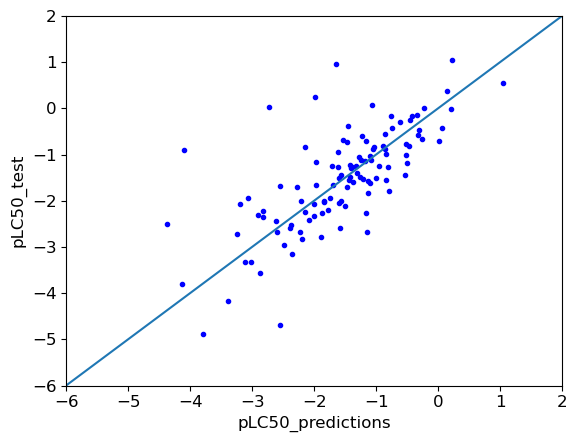

In [326]:
plt.plot(y4_pred,y4_test, 'b.')
plt.xlabel('pLC50_predictions', fontsize = 12)
plt.ylabel('pLC50_test', rotation = 'vertical', fontsize = 12)
plt.axis([-6, 2, -6,2])
ident = [-6, 2]
plt.plot(ident,ident)
plt.show()

## 7. Support Vector Machine trained with full dataset (Mordred descriptors)

In [327]:
# Creating dataframe for toxicity and mordred dataset

df3 = pd.read_csv('./fathead_minnow_dataset.csv')
df4 = pd.read_csv('./mordred_descriptors.csv')


In [328]:
LC50 = df3['LC50_(mg/L)'].tolist()
LC50_binary_list = []

for value in LC50:
    if value > 0.5:
        LC50_binary_list.append(0) # not high toxicity
    elif value <= 0.5:
        LC50_binary_list.append(1)
LC50_binary = np.array(LC50_binary_list)

df_LC50_binary = pd.DataFrame(LC50_binary, columns = ['LC50_binary'])
df_LC50_binary


,LC50_binary
0,0
1,0
2,0
3,0
4,0
...,...
549,0
550,0
551,0
552,0


In [329]:
# Create X (all features) and y (binary toxicity) dataframe

df4['LC50_binary'] = df_LC50_binary['LC50_binary']
df4 = df4.drop(df4.columns[0],axis=1)
df4 = df4.drop(df4.columns[0],axis=1)
X = df4.drop('LC50_binary', axis=1)
y = df4['LC50_binary']

In [335]:
# build the SVM model


np.random.seed(42)
seed = 42 # Manually set the seed value as it is needed for the kfold set up


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) #  5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X, y): # this loop sets a new test/train split for each iteration in the loop

    # using GridSearch to find the optimal parameters for the SVM model
    param_grid = {'C':[0.1,0.5,1],
             'kernel':['rbf','poly'],
              'gamma':['scale'],
              'degree':[3,4]}
    grid = GridSearchCV(svm.SVC(),param_grid)  
    
    grid.fit(X.iloc[train],y[train])
    
    y_pred = grid.predict(X.iloc[test])   #Prediction for test dataset
    
    print ("Best parameters:",grid.best_params_)
    
    print("Accuracy:",metrics.accuracy_score(y[test], y_pred)*100)
    
    cvscores.append(metrics.accuracy_score(y[test], y_pred)*100)    
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))   # obtain average accuracy(and SD) of 5 runs 


Best parameters: {'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 90.09009009009009
Best parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 91.8918918918919
Best parameters: {'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 93.69369369369369
Best parameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 90.990990990991
Best parameters: {'C': 0.1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 92.72727272727272
91.88% (+/- 1.27%)


## 8. Support Vector Machine trained with only top features from lasso regression analysis (Mordred descriptors)

In [337]:
# select top 5 features from Lasso regression feature selection for training SVM model

X = df4[['SLogP','PEOE_VSA6','AATS1s','BCUTc-1h','EState_VSA5']]
X

,SLogP,PEOE_VSA6,AATS1s,BCUTc-1h,EState_VSA5
0,0.42366,0.000000,6.750000,0.384444,0.000000
1,0.03320,0.000000,2.678571,0.319675,0.000000
2,-0.57830,0.000000,3.272727,0.189620,5.008913
3,2.61140,30.331835,3.860082,0.469705,12.132734
4,1.85410,0.000000,1.753704,0.241348,0.000000
...,...,...,...,...,...
549,3.41930,50.097216,2.330247,0.304972,31.246738
550,1.56510,0.000000,3.272727,0.381017,0.000000
551,2.84780,36.398202,3.215517,0.373956,0.000000
552,3.18460,49.282745,1.880087,0.224243,0.000000


In [338]:
# build the SVM model


np.random.seed(42)
seed = 42 # Manually set the seed value as it is needed for the kfold set up


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) #  5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X, y): # this loop sets a new test/train split for each iteration in the loop

    # using GridSearch to find the optimal parameters for the SVM model
    param_grid = {'C':[0.1,0.5,1],
             'kernel':['rbf','poly'],
              'gamma':['scale'],
              'degree':[3,4]}
    grid = GridSearchCV(svm.SVC(),param_grid)  
    
    grid.fit(X.iloc[train],y[train])
    
    y_pred = grid.predict(X.iloc[test])   #Prediction for test dataset
    
    print ("Best parameters:",grid.best_params_)
    
    print("Accuracy:",metrics.accuracy_score(y[test], y_pred)*100)
    
    cvscores.append(metrics.accuracy_score(y[test], y_pred)*100)    
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))   # obtain average accuracy(and SD) of 5 runs 


Best parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 91.8918918918919
Best parameters: {'C': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 95.4954954954955
Best parameters: {'C': 0.1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 94.5945945945946
Best parameters: {'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 93.69369369369369
Best parameters: {'C': 0.1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 92.72727272727272
93.68% (+/- 1.28%)


# Section 2: Random Forests

In [123]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= '0.20'
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as c
np.random.seed(42)



first data is processed and labelled with class 0 or 1 based on whether the molecule is toxic or not 

In [107]:
molecules = pd.read_csv('./fathead_minnow_dataset.csv')
class_list=[]
for val in molecules.values:
    if val[2]<=0.5: #if Lc50 value is lower than 0.5 then molecule is toxic
        class_list.append(1)
    else:
        class_list.append(0) #if Lc50 value is larger than 0.5 then molecule is not toxic 
lc50_binary=np.array(class_list) # convery into array 


## Rd_kit descriptors


In [159]:
rd_kit=pd.read_csv('./rdkit_descriptors.csv')
col_list=list(range(2,210)) # skip first two columns of indexes and smiles 
X=rd_kit.iloc[:, col_list] 
y=lc50_binary
X_train, X_test, y_train, y_test = train_test_split(X, y)
X

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,7.593750,0.000000,7.593750,0.000000,0.411164,66.063,64.047,66.021798,24,0,...,0,0,0,0,0,0,0,0,0,0
1,4.944444,0.777778,4.944444,0.777778,0.415749,88.106,80.042,88.052429,36,0,...,0,0,0,0,0,0,0,0,0,0
2,4.944444,1.500000,4.944444,1.500000,0.299219,60.100,52.036,60.068748,26,0,...,0,0,0,0,0,0,0,0,0,0
3,11.652689,-0.565463,11.652689,0.080156,0.617037,214.220,204.140,214.062994,80,0,...,0,0,0,0,0,0,0,0,0,0
4,5.217207,0.684028,5.217207,0.684028,0.479095,112.987,106.939,111.984656,32,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2.241065,1.244722,2.241065,1.244722,0.573822,148.249,132.121,148.125201,60,0,...,0,0,0,0,0,0,0,0,1,0
550,10.274032,0.718148,10.274032,0.718148,0.594673,149.193,138.105,149.084064,58,0,...,0,0,0,0,0,0,0,0,0,0
551,5.647557,0.573704,5.647557,0.573704,0.771297,199.253,186.149,199.099714,76,0,...,0,0,0,0,0,0,0,0,0,0
552,2.222269,0.766111,2.222269,0.766111,0.566681,150.312,136.200,150.053692,50,0,...,0,0,0,0,0,0,0,0,0,0


figure of descision tree for presentation 

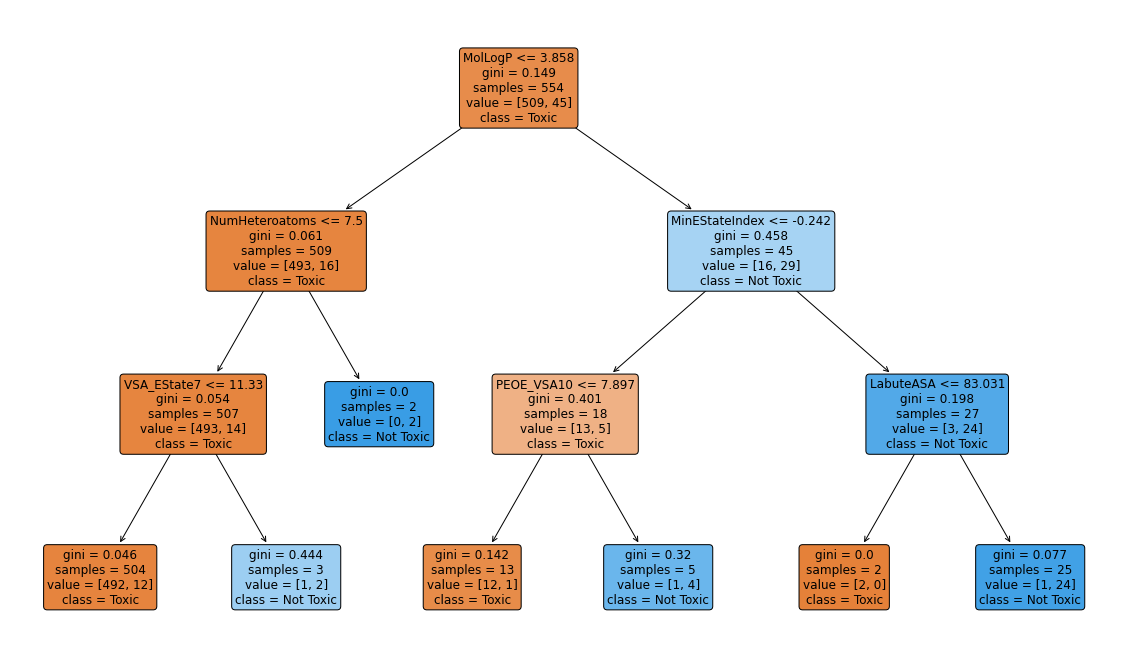

In [134]:
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X, y)
targets=np.array(['Toxic','Not Toxic'])

plt.figure(figsize = (20,12))
plot_tree(tree_clf,
          feature_names = X.columns,
          class_names = targets,
          rounded = True,
          filled = True,
          fontsize=12
)
plt.savefig("simple_rd_kit_tree.png", format="png", bbox_inches="tight")
plt.show() #This line is only here to suppress the plot_tree output.

first model is simple random forest model with no modifications 

In [109]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.935251798561151


can add parameters to stop overfitting 

In [135]:
rnd_clf_rd = RandomForestClassifier(max_depth=3,max_leaf_nodes=10)
rnd_clf_rd.fit(X_train, y_train)
y_pred = rnd_clf_rd.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9280575539568345


experiments on usig Bagging classifier 

In [138]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=7), n_estimators = 100,
    max_samples = 100, bootstrap = True, n_jobs = -1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print('bagging classifier:', accuracy_score(y_test, y_pred))

bagging classifier: 0.9424460431654677


Use 5-fold cross validation 

In [140]:
score_rdkit_dict={} #initiate an empty dictionary 
for name in X.columns:
    score_rdkit_dict.update({name:0}) #add each feature with value of zero 
  

In [141]:

seed = 42 
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) #create 5 splits of data 
cvscores=[] #empty list for accuracys 
for train, test in kfold.split(X,y):

    forest_clf = RandomForestClassifier(n_estimators = 100)

    forest_clf.fit(X.iloc[train], y[train])
    y_pred = forest_clf.predict(X.iloc[test])
    print(accuracy_score(y[test], y_pred)*100) # prints accuracy of each iteration 
    
    cvscores.append(accuracy_score(y[test], y_pred)*100) # add accuracy to list 
    for nam, score in zip(X.columns, forest_clf.feature_importances_): #loop through each feature 
        add=score_rdkit_dict[nam] #previous importance score 
        x=add+score #add new iporatnce score to previous
        score_rdkit_dict.update({nam:x}) #update dictionary
        
print("%.2f%% (+/- %.2f%%)"%(np.mean(cvscores),np.std(cvscores)))   #prints average accuracy and standard deviation         

for scr in score_rdkit_dict:  #find adverage importance score for each feature 
    val=score_rdkit_dict[scr]/5
    score_rdkit_dict.update({scr:val}) #update dictionary to adverage scores instead of cummulative




92.7927927927928
94.5945945945946
94.5945945945946
94.5945945945946
94.54545454545455
94.22% (+/- 0.72%)


Find most important feature 

In [142]:
for feature in score_rdkit_dict:  
    if score_rdkit_dict[feature]>0.018:
        print(feature,score_rdkit_dict[feature])

Chi0v 0.01912575959610398
PEOE_VSA6 0.04651806415281447
VSA_EState7 0.019314725103432052
MolLogP 0.062303886860332766
MolMR 0.020096784400813677


Create graph to show feature importances 

In [143]:
X=[]
y=[]
for x in score_rdkit_dict:
    if score_rdkit_dict[x]>0.01: #only include features that have importance above 0.01 
        X.append(x)
        y.append(score_rdkit_dict[x])
len(X) #check how many features are included 


34

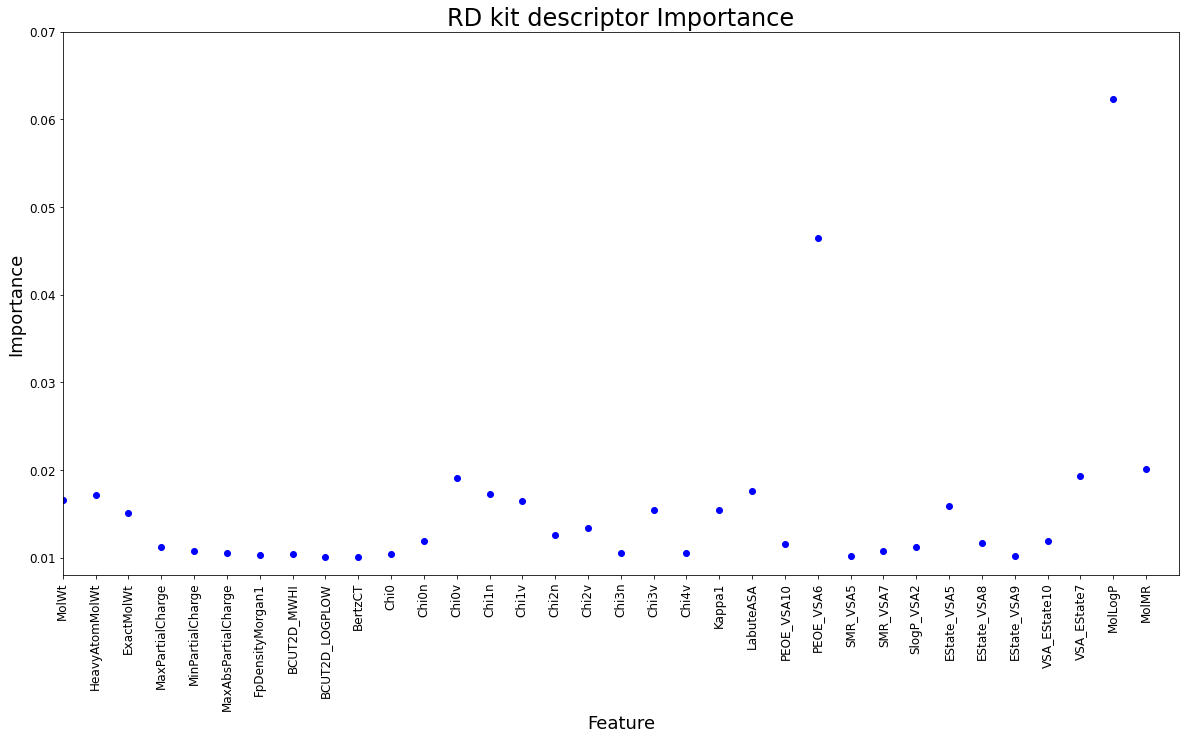

In [144]:

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

plt.figure(figsize = (20,10))
plt.plot(X, y, 'b.', markersize=12)
plt.xlabel('Feature',rotation = 0, fontsize = 18)
plt.ylabel('Importance', rotation = 90, fontsize = 18)
plt.title('RD kit descriptor Importance', fontsize = 24)
plt.xticks(rotation = 90)
plt.axis([0, 34, 0.008, 0.07])
plt.savefig("RD_kit_descriptor_importance.png", format="png", bbox_inches="tight")
plt.show()


## Mordred Descriptors

In [86]:

mordred= pd.read_csv('./mordred_descriptors.csv')
col_list=list(range(2,1123)) #skip first two columns of indexes and smiles 
X_mor=mordred.iloc[:, col_list]
y_mor=lc50_binary
X_train_mor, X_test_mor, y_train_mor, y_test_mor = train_test_split(X_mor, y_mor)

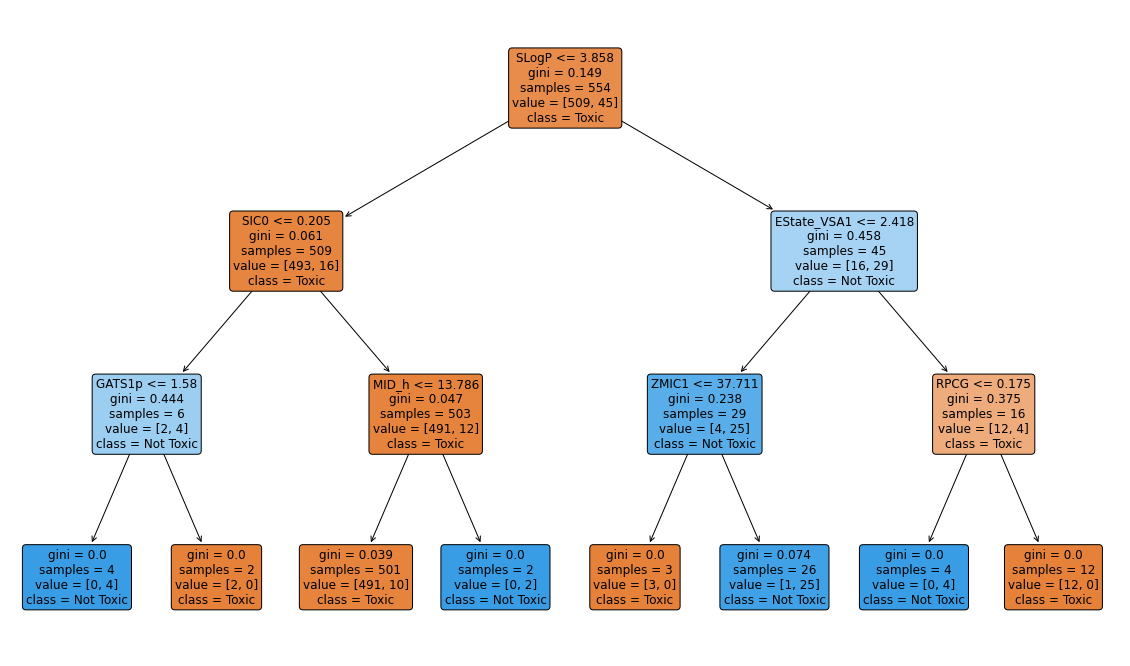

In [145]:
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_mor, y_mor)
targets=np.array(['Toxic','Not Toxic'])

plt.figure(figsize = (20,12))
plot_tree(tree_clf,
          feature_names = X_mor.columns,
          class_names = targets,
          rounded = True,
          filled = True,
          fontsize=12
)
plt.savefig("simple_mordred_tree.png", format="png", bbox_inches="tight")
plt.show() #This line is only here to suppress the plot_tree output.

In [146]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train_mor, y_train_mor)
y_pred_mor = rnd_clf.predict(X_test_mor)
print(accuracy_score(y_test_mor, y_pred_mor))

0.935251798561151


add parameters to random forest 

In [148]:
rnd_clf = RandomForestClassifier(max_depth=5,max_leaf_nodes=10)
rnd_clf.fit(X_train_mor, y_train_mor)
y_pred_mor = rnd_clf.predict(X_test_mor)
print(accuracy_score(y_test_mor, y_pred_mor))

0.9280575539568345


experiment with bagging model 

In [16]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 100,
    max_samples = 400, bootstrap = True, n_jobs = -1)

bag_clf.fit(X_train_mor, y_train_mor)

y_pred_mor = bag_clf.predict(X_test_mor)
print('bagging classifier:', accuracy_score(y_test_mor, y_pred_mor))
    

bagging classifier: 0.9496402877697842


Use 5-fold cross validation 

In [87]:
seed = 42 
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) #split data 5 times using kfold
cvscores=[]
score_dict={} #create new dictionary 

for name in X_mor.columns:
    score_dict.update({name:0}) # add each feature to dictionary 


for train, test in kfold.split(X_mor,y_mor): #loop through each kfold with random forest model 

    forest_clf = RandomForestClassifier(n_estimators = 100) 

    forest_clf.fit(X_mor.iloc[train], y_mor[train])
    y_pred = forest_clf.predict(X_mor.iloc[test])
    print(accuracy_score(y_mor[test], y_pred)*100) #print accuracy from each random forest 
    cvscores.append(accuracy_score(y_mor[test], y_pred)*100) # add score to list 
    
    for nam, score in zip(X_mor.columns, forest_clf.feature_importances_): #loop through each feature and its imporatnce factor 
        add=score_dict[nam] #previous importance score 
        x=add+score #add new importance to previous 
        score_dict.update({nam:x}) #update dictionary with new important scores 
for scr in score_dict:
    val=score_dict[scr]/5
    score_dict.update({scr:val}) #calculate average importance scores for each feature 
         
        
print("%.2f%% (+/- %.2f%%)"%(np.mean(cvscores),np.std(cvscores))) # print average accuracy and standard deviation 

91.8918918918919
92.7927927927928
95.4954954954955
93.69369369369369
93.63636363636364
93.50% (+/- 1.19%)


In [172]:

for x in score_dict:
    
    if score_dict[x]>0.005: # find most important features 
        print(x,score_dict[x])

# only the top 3 ranked parameters were used in top features list used to train the new models (FilterItLogS, PEOE_VSA6, SLogP)      

SpMAD_Dzm 0.005263501294768198
SdCH2 0.005552986991716313
SIC0 0.00736702513413526
BIC0 0.007863431737734952
ZMIC1 0.007530583547031901
ZMIC2 0.005045415321660385
FilterItLogS 0.01971320405870814
PEOE_VSA6 0.016084500186925445
SLogP 0.02146778764770316


In [98]:
X_mor=[]
y=[]

for x in score_dict:
    if score_dict[x]>0.003 : # add only features that have importance over 0.003 for graph 
        X_mor.append(x)
        y.append(score_dict[x])

len(X_mor)
# len(y)

31

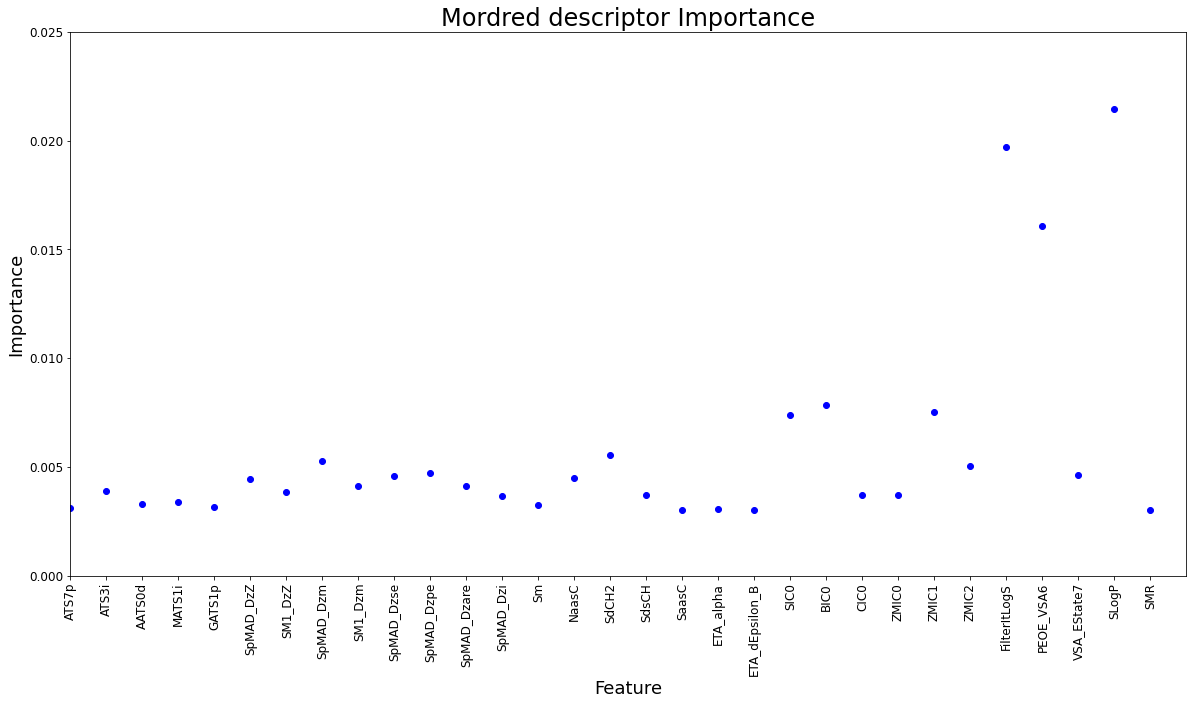

In [99]:

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

plt.figure(figsize = (20,10))
plt.plot(X_mor, y, 'b.',markersize=12)

plt.xlabel('Feature',rotation = 0, fontsize = 18)
plt.ylabel('Importance', rotation = 90, fontsize = 18)
plt.xticks(rotation = 90)
plt.axis([0, 31, 0, 0.025])
plt.title('Mordred descriptor Importance', fontsize = 24)
plt.savefig('Mordred_descriptor_Importance.png', format="png", bbox_inches="tight")
plt.show()


## Combined model 

In [161]:
col_list_rd=list(range(2,210))
col_list_mor=list(range(2,1123))

X_com=pd.concat([rd_kit.iloc[:, col_list_rd] ,mordred.iloc[:, col_list_mor]],axis=1) # combine rd kit and mordred descriptors 
y_com=lc50_binary

In [162]:
seed = 42 
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) #split data 5 times using kfold
cvscores=[]
score_dict_com={} #create new dictionary 

for name in X_com.columns:
    score_dict_com.update({name:0}) # add each feature to dictionary 


for train, test in kfold.split(X_com,y_com): #loop through each kfold with random forest model 

    forest_clf = RandomForestClassifier(n_estimators = 100) 

    forest_clf.fit(X_com.iloc[train], y_com[train])
    y_pred = forest_clf.predict(X_com.iloc[test])
    print(accuracy_score(y_com[test], y_pred)*100) #print accuracy from each random forest 
    cvscores.append(accuracy_score(y_com[test], y_pred)*100) # add score to list 
    
    for nam, score in zip(X_com.columns, forest_clf.feature_importances_): #loop through each feature and its imporatnce factor 
        add=score_dict_com[nam] #previous importance score 
        x=add+score #add new importance to previous 
        score_dict_com.update({nam:x}) #update dictionary with new important scores 
for scr in score_dict_com:
    val=score_dict_com[scr]/5
    score_dict_com.update({scr:val}) #calculate average importance scores for each feature 
         
        
print("%.2f%% (+/- %.2f%%)"%(np.mean(cvscores),np.std(cvscores))) # print average accuracy and standard deviation 

91.8918918918919
92.7927927927928
95.4954954954955
93.69369369369369
94.54545454545455
93.68% (+/- 1.27%)


this may not be trusted as some features are found in both mordred and rd kit so dictionary would have overwritten and combined scores 

In [164]:
for x in score_dict_com:
    
    if score_dict_com[x]>0.01: # find most imporatant features 
        print(x,score_dict_com[x])


PEOE_VSA6 0.029018808650431365
VSA_EState7 0.010222983219088457
MolLogP 0.03781579919148481


## Random Forest model on only top features 

In [177]:
feature_list_rd_kit=['MolLogP','PEOE_VSA6','MolMR','VSA_EState7','Chi0v'] #top features from previus random forest 
feature_list_mordred=['SLogP','FilterItLogS']
X_top=pd.concat([rd_kit[feature_list_rd_kit] ,mordred[feature_list_mordred]],axis=1) # combine top features from rd kit and mordred descriptors 
y_top=lc50_binary

In [178]:
seed = 42 
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) #split data 5 times using kfold
cvscores=[]

for train, test in kfold.split(X_top,y_top): #loop through each kfold with random forest model 

    forest_clf = RandomForestClassifier(n_estimators = 100) 

    forest_clf.fit(X_top.iloc[train], y_top[train])
    y_pred = forest_clf.predict(X_top.iloc[test])
    print(accuracy_score(y_top[test], y_pred)*100) #print accuracy from each random forest 
    cvscores.append(accuracy_score(y_top[test], y_pred)*100) # add score to list 

        
print("%.2f%% (+/- %.2f%%)"%(np.mean(cvscores),np.std(cvscores))) # print average accuracy and standard deviation 

92.7927927927928
95.4954954954955
94.5945945945946
92.7927927927928
92.72727272727272
93.68% (+/- 1.15%)


# Section 3: Dimensionality Reduction & Clustering

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem, Descriptors, MolFromSmiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.decomposition import PCA

In [3]:
rdkit_descriptors=pd.read_csv('rdkit_descriptors.csv')

In [4]:
fathead=pd.read_csv('fathead_minnow_dataset.csv')
lc50=fathead['LC50_(mg/L)']
lc50_binary_list = []
for value in lc50:
    if value > 0.5:
        lc50_binary_list.append(0) # not high toxicity
    else:
        lc50_binary_list.append(1)
# lc50_binary_list  
LC50=pd.DataFrame({'LC50':lc50_binary_list})

## RDKit

In [5]:
rdkit_descriptors_lc50=rdkit_descriptors.join(LC50)

In [6]:
data=rdkit_descriptors_lc50.to_numpy()[:,2:]

In [7]:
x=data[:,:-1]
y=data[:,-1]

## Mordred

In [8]:
mordred_descriptors=pd.read_csv('mordred_descriptors.csv')
mordred_descriptors_lc50=mordred_descriptors.join(LC50)
data_m=mordred_descriptors_lc50.to_numpy()[:,2:]
x_m=data_m[:,:-1]
y_m=data_m[:,-1]

## LocallyLinearEmbedding LLE

In [9]:
from sklearn.manifold import LocallyLinearEmbedding

### All-features

In [10]:
colour_list=['blue' if i==0 else 'green' for i in y]

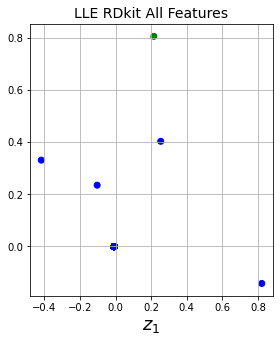

In [18]:
#LLE
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors=10, reg=0.001,
    eigen_solver='dense',
    tol=1e-06,
    max_iter=100,
    method='hessian',
    hessian_tol=0.0001,
    modified_tol=1e-12,
    neighbors_algorithm='brute',
    random_state=20,
    n_jobs=3,)
X_reduced_lle = lle.fit_transform(x)
plt.figure(figsize = (20, 5))

plt.subplot(141)
plt.title('LLE RDkit All Features', fontsize = 14)
plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], c = colour_list, cmap = plt.cm.hot)
plt.xlabel('$z_1$', fontsize = 18)
# if subplot == 131:
#     plt.ylabel('$z_2$', fontsize = 18, rotation = 0)
plt.grid(True)

In [12]:
lle.get_params()

{'eigen_solver': 'dense',
 'hessian_tol': 0.0001,
 'max_iter': 100,
 'method': 'hessian',
 'modified_tol': 1e-12,
 'n_components': 2,
 'n_jobs': 3,
 'n_neighbors': 10,
 'neighbors_algorithm': 'brute',
 'random_state': 20,
 'reg': 0.001,
 'tol': 1e-06}

### Mordred

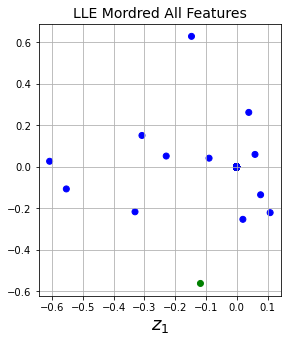

In [17]:
#LLE
lle_mor = LocallyLinearEmbedding(n_components = 2, n_neighbors=7, reg=0.001,
    eigen_solver='dense',
    tol=1e-06,
    max_iter=100,
    method='hessian',
    hessian_tol=0.0001,
    modified_tol=1e-12,
    neighbors_algorithm='brute',
    random_state=20,
    n_jobs=3,)
X_reduced_lle_m = lle_mor.fit_transform(x_m)
plt.figure(figsize = (20, 5))

plt.subplot(141)
plt.title('LLE Mordred All Features', fontsize = 14)
plt.scatter(X_reduced_lle_m[:, 0], X_reduced_lle_m[:, 1], c = colour_list, cmap = plt.cm.hot)
plt.xlabel('$z_1$', fontsize = 18)
# if subplot == 131:
#     plt.ylabel('$z_2$', fontsize = 18, rotation = 0)
plt.grid(True)

### Top features from Regression Analysis and Random Forests

In [20]:
# RDKit feature list
feature_list_total=['MolLogP','PEOE_VSA6','Kappa2','VSA_EState9','PEOE_VSA5','fr_ester','MolMR','Chi0v','VSA_EState7']
list_partial_total=rdkit_descriptors_lc50[feature_list_total].to_numpy()

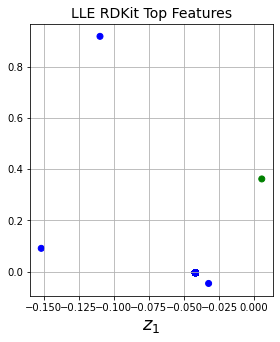

In [21]:
lle_rd = LocallyLinearEmbedding(n_components = 2, n_neighbors=10 # number of neighbours = 7 for Mordred 
                             , reg=0.001,
    eigen_solver='dense',
    tol=1e-06,
    max_iter=100,
    method='hessian',
    hessian_tol=0.0001,
    modified_tol=1e-12,
    neighbors_algorithm='brute',
    random_state=20,
    n_jobs=3,)
X_reduced_lle = lle_rd.fit_transform(list_partial_total)
plt.figure(figsize = (20, 5))

plt.subplot(141)
plt.title('LLE RDKit Top Features', fontsize = 14)
plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], c = colour_list, cmap = plt.cm.hot)
plt.xlabel('$z_1$', fontsize = 18)
# if subplot == 131:
#     plt.ylabel('$z_2$', fontsize = 18, rotation = 0)
plt.grid(True)

In [23]:
#Modred feature list
feature_list2=['SLogP','PEOE_VSA6','AATS1s','BCUTc-1h','EState_VSA5','PEOE_VSA10','JGI2','ATSC2se','NdCH2','ATSC3s','FilterItLogS']
list_partial2=mordred_descriptors_lc50[feature_list2].to_numpy()

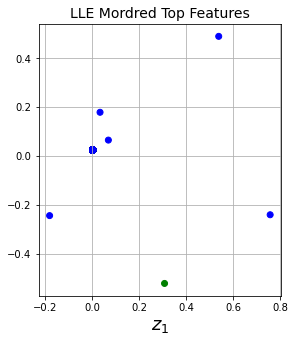

In [24]:
lle_mor = LocallyLinearEmbedding(n_components = 2, n_neighbors=7 # number of neighbours = 7 for Mordred 
                             , reg=0.001,
    eigen_solver='dense',
    tol=1e-06,
    max_iter=100,
    method='hessian',
    hessian_tol=0.0001,
    modified_tol=1e-12,
    neighbors_algorithm='brute',
    random_state=20,
    n_jobs=3,)
X_reduced_lle_m = lle_mor.fit_transform(list_partial2) # this uses RDKit as input features, change to list_partial2 for Mordred features
plt.figure(figsize = (20, 5))

plt.subplot(141)
plt.title('LLE Mordred Top Features', fontsize = 14)
plt.scatter(X_reduced_lle_m[:, 0], X_reduced_lle_m[:, 1], c = colour_list, cmap = plt.cm.hot)
plt.xlabel('$z_1$', fontsize = 18)
# if subplot == 131:
#     plt.ylabel('$z_2$', fontsize = 18, rotation = 0)
plt.grid(True)

## Obtaining & tuning the parameters of the LLE model:

### These following results are from the RDkit 3D plot:

In [18]:
lle.embedding_ # coordinates of points in the 3D diagram

array([[-0.00768245, -0.00075263],
       [-0.00768245, -0.00075263],
       [-0.00768245, -0.00075263],
       ...,
       [-0.00768245, -0.00075263],
       [-0.00768245, -0.00075263],
       [-0.00768245, -0.00075263]])

In [19]:
lle.reconstruction_error_ # metric for the data lost in the model

-8.735927240934236e-15

In [20]:
lle.n_features_in_ # number of features (= number of features in the RDKit library)

208

In [21]:
lle.nbrs_ # In the RDKit LLE, the 10 nearest neighbours were used

NearestNeighbors(algorithm='brute', n_jobs=3, n_neighbors=10)

### 3D plotting (of RDkit)

In [22]:
from mpl_toolkits import mplot3d

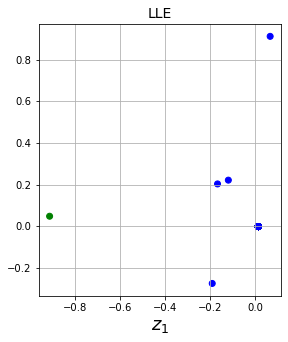

In [23]:
lle = LocallyLinearEmbedding(n_components = 3, n_neighbors=10, reg=0.001,
    eigen_solver='dense',
    tol=1e-06,
    max_iter=100,
    method='hessian',
    hessian_tol=0.0001,
    modified_tol=1e-12,
    neighbors_algorithm='brute',
    random_state=20,
    n_jobs=3,)
X_reduced_lle = lle.fit_transform(x)
plt.figure(figsize = (20, 5))

plt.subplot(141)
plt.title('LLE', fontsize = 14)
plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 2], c = colour_list, cmap = plt.cm.hot)
plt.xlabel('$z_1$', fontsize = 18)
# if subplot == 131:
#     plt.ylabel('$z_2$', fontsize = 18, rotation = 0)
plt.grid(True)

<IPython.core.display.Javascript object>


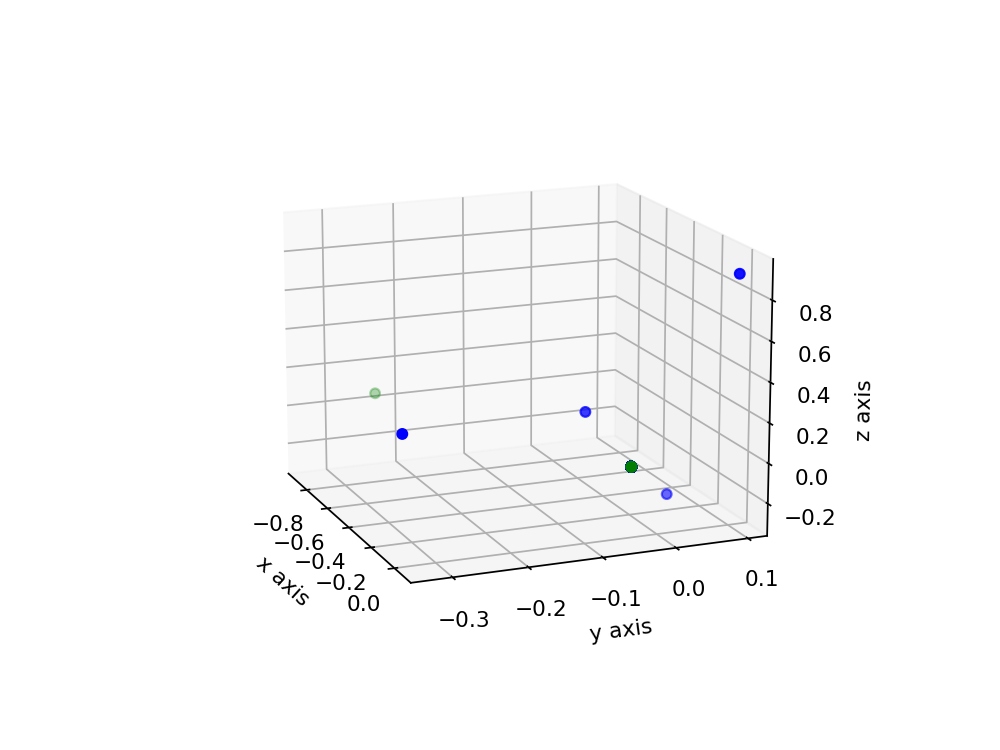

In [24]:
#3D plot
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1],X_reduced_lle[:, 2], c=colour_list, marker='o')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()

# Section 4: Artificial Neural Network (ANN)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem, Descriptors, MolFromSmiles
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras

### Three representations of molecules: Morgan finger prints, RDKit descriptors, and Morder descriptors

In [2]:
# Import main data and get list of SMILES
molecules = pd.read_csv('./fathead_minnow_dataset.csv')  # Load the photoswitch dataset using pandas
smiles_list = list(molecules.SMILES.values)

# Initiate list of rdkit molecules
rdkit_mols = [MolFromSmiles(smiles) for smiles in smiles_list]

# Get Morgan fingerprints, note the parameters!
morgan_fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, radius = 3, nBits = 2048) for mol in rdkit_mols]
morgan_fingerprints = np.asarray(morgan_fingerprints)

# Turn into pandas dataframe and add smiles as a first column
morgan_fingerprints = pd.DataFrame(data = morgan_fingerprints)
morgan_fingerprints.insert(0, 'SMILES', smiles_list)
morgan_fingerprints

,SMILES,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,N#CCC#N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C1COCCO1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CN(C)N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C1=CC=CC(O)=C1C(=O)OC2=CC=CC=C2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ClCCCCl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,C1=CC=CC=C1CCCCC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,CN(C)C1=CC=C(C=O)C=C1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551,C1=C(N)C=CC=C1OCC2=CC=CC=C2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
552,CC(C)SSC(C)C,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
morgan_fingerprints = morgan_fingerprints.to_numpy()

X = morgan_fingerprints[:,1::].astype(int)
X.shape

(554, 2048)

In [4]:
fathead_minnow = pd.read_csv("fathead_minnow_dataset.csv", sep=",", header=0)
fathead_minnow = fathead_minnow.to_numpy()

LC50 = fathead_minnow[:,-1].astype(float)# Last column is LC50 values
y = np.array([1 if i < 0.5 else 0 for i in LC50]).astype(int)# Turn LC50 into a binary classification
#y

In [5]:
# build the model

seed = 42 # Manually set the seed value as it is needed for the kfold set up
tf.random.set_seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X, y): # this loop sets a new test/train split for each iteration in the loop

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [2048]),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(2, activation = 'softmax')
    ])

    model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
    
    history = model.fit(X[train], y[train], epochs=20)
    
    # these lines here record all the scores
    scores = model.evaluate(X[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6117
Epoch 2/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.9074
Epoch 3/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.9187
Epoch 4/20
14/14 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.9187
Epoch 5/20
14/14 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.9187
Epoch 6/20
14/14 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.9187
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.9187
Epoch 8/20
14/14 [==============================] - 0s 1ms/step - loss: 0.3000 - accuracy: 0.9187
Epoch 9/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.9187
Epoch 10/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.9187
Epoch 11/20
14/14 [

In [30]:
rdkit_descriptors = pd.read_csv('rdkit_descriptors.csv')
rdkit_descriptors_array = rdkit_descriptors.to_numpy()

X1 = rdkit_descriptors_array[:,2::].astype(float)
X1.shape

(554, 208)

In [31]:
keras.backend.clear_session() # This ensures that any previous runs don't interfere.

# build the model

seed = 42 # Manually set the seed value as it is needed for the kfold set up
tf.random.set_seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X1, y): # this loop sets a new test/train split for each iteration in the loop

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [208]),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(2, activation = 'softmax')
    ])

    model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
    
    history = model.fit(X1[train], y[train], epochs=20)
    
    # these lines here record all the scores
    scores = model.evaluate(X1[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/20
14/14 [==============================] - 0s 815us/step - loss: 5553113.5000 - accuracy: 0.7698
Epoch 2/20
14/14 [==============================] - 0s 943us/step - loss: 0.6235 - accuracy: 0.9187
Epoch 3/20
14/14 [==============================] - 0s 946us/step - loss: 0.5866 - accuracy: 0.9187
Epoch 4/20
14/14 [==============================] - 0s 866us/step - loss: 0.5545 - accuracy: 0.9187
Epoch 5/20
14/14 [==============================] - 0s 901us/step - loss: 0.5266 - accuracy: 0.9187
Epoch 6/20
14/14 [==============================] - 0s 923us/step - loss: 0.5021 - accuracy: 0.9187
Epoch 7/20
14/14 [==============================] - 0s 958us/step - loss: 0.4805 - accuracy: 0.9187
Epoch 8/20
14/14 [==============================] - 0s 927us/step - loss: 0.4615 - accuracy: 0.9187
Epoch 9/20
14/14 [==============================] - 0s 987us/step - loss: 0.4447 - accuracy: 0.9187
Epoch 10/20
14/14 [==============================] - 0s 926us/step - loss: 0.4298 - accuracy: 

In [26]:
mordred_descriptors = pd.read_csv('mordred_descriptors.csv')
mordred_descriptors_array = mordred_descriptors.to_numpy()

In [27]:
X2 = mordred_descriptors_array[:,2::].astype(float)

In [28]:
X2.shape

(554, 1121)

In [29]:
keras.backend.clear_session() # This ensures that any previous runs don't interfere.

# build the model

seed = 42 # Manually set the seed value as it is needed for the kfold set up
tf.random.set_seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X2, y): # this loop sets a new test/train split for each iteration in the loop

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [1121]),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(2, activation = 'softmax')
    ])

    model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
    
    history = model.fit(X2[train], y[train], epochs=20)
    
    # these lines here record all the scores
    scores = model.evaluate(X2[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/20
14/14 [==============================] - 0s 2ms/step - loss: 25820737536.0000 - accuracy: 0.8262
Epoch 2/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.9187
Epoch 3/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2854 - accuracy: 0.9187
Epoch 4/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2843 - accuracy: 0.9187
Epoch 5/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.9187
Epoch 6/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.9187
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.9187
Epoch 8/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.9187
Epoch 9/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.9187
Epoch 10/20
14/14 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.9187
Epoch 11/

### Combine different representations of molecules

In [38]:
X3 = np.append(X, X1, axis=1) # X3 is Morgan fingerprint + rdkit
X3.shape

(554, 2256)

In [39]:
keras.backend.clear_session() # This ensures that any previous runs don't interfere.

# build the model

seed = 42 # Manually set the seed value as it is needed for the kfold set up
tf.random.set_seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X3, y): # this loop sets a new test/train split for each iteration in the loop

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [2256]),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(2, activation = 'softmax')
    ])

    model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
    
    history = model.fit(X3[train], y[train], epochs=20)
    
    # these lines here record all the scores
    scores = model.evaluate(X3[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/20
14/14 [==============================] - 0s 2ms/step - loss: 11737563136.0000 - accuracy: 0.6862
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 879883.3125 - accuracy: 0.9165
Epoch 3/20
14/14 [==============================] - 0s 1ms/step - loss: 34129.2734 - accuracy: 0.9187
Epoch 4/20
14/14 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.9187
Epoch 5/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.9187
Epoch 6/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.9187
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.9187
Epoch 8/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.9187
Epoch 9/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.9187
Epoch 10/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.9187


In [24]:
X4 = np.append(X, X2, axis=1) # X4 is Morgan fingerprint + mordred
X4.shape

(554, 3169)

In [25]:
keras.backend.clear_session() # This ensures that any previous runs don't interfere.

# build the model

seed = 42 # Manually set the seed value as it is needed for the kfold set up
tf.random.set_seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X4, y): # this loop sets a new test/train split for each iteration in the loop

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [3169]),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(2, activation = 'softmax')
    ])

    model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
    
    history = model.fit(X4[train], y[train], epochs=20)
    
    # these lines here record all the scores
    scores = model.evaluate(X4[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/20
14/14 [==============================] - 0s 1ms/step - loss: 33959672.0000 - accuracy: 0.8330
Epoch 2/20
14/14 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.9187
Epoch 3/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.9187
Epoch 4/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.9187
Epoch 5/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.9187
Epoch 6/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.9187
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.9187
Epoch 8/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.9187
Epoch 9/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.9187
Epoch 10/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.9187
Epoch 11/20


In [20]:
X5 = np.append(X1, X2, axis=1) #X5 is rdkit + mordred descriptor
X5.shape

(554, 1329)

In [21]:
keras.backend.clear_session() # This ensures that any previous runs don't interfere.

# build the model

seed = 42 # Manually set the seed value as it is needed for the kfold set up
tf.random.set_seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X5, y): # this loop sets a new test/train split for each iteration in the loop

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [1329]),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(2, activation = 'softmax')
    ])

    model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
    
    history = model.fit(X5[train], y[train], epochs=20)
    
    # these lines here record all the scores
    scores = model.evaluate(X5[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/20
14/14 [==============================] - 0s 1ms/step - loss: 35510531905290240.0000 - accuracy: 0.6975
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 642989051898847297536.0000 - accuracy: 0.9165
Epoch 3/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.9187
Epoch 4/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.9187
Epoch 5/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.9187
Epoch 6/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.9187
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.9187
Epoch 8/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.9187
Epoch 9/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.9187
Epoch 10/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4295 - 

In [14]:
X6 = np.append(X3, X2, axis=1) #X6 is Morgan fingerprint + rdkit + mordred descriptor
X6.shape

(554, 3377)

In [15]:
keras.backend.clear_session() # This ensures that any previous runs don't interfere.

# build the model

seed = 42 # Manually set the seed value as it is needed for the kfold set up
tf.random.set_seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split((tf.expand_dims(X6, axis=-1)), y): # this loop sets a new test/train split for each iteration in the loop

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [3377]),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(2, activation = 'softmax')
    ])

    model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
    
    history = model.fit(X6[train], y[train], epochs=20)
    
    # these lines here record all the scores
    scores = model.evaluate(X6[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/20
14/14 [==============================] - 0s 2ms/step - loss: 2039914044588032.0000 - accuracy: 0.7743
Epoch 2/20
14/14 [==============================] - 0s 1ms/step - loss: 413.6737 - accuracy: 0.9187
Epoch 3/20
14/14 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.9187
Epoch 4/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.9187
Epoch 5/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.9187
Epoch 6/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.9187
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.9187
Epoch 8/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.9187
Epoch 9/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.9187
Epoch 10/20
14/14 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.9187
Ep

## Use top features from random forest and regression to train the model. 

In [ ]:
# top 5 features from the random forest

feature_list_rd_kit = ['MolLogP','PEOE_VSA6','Chi1n'] 
feature_list_mordred = ['SLogP','FilterItLogS']
X7_df = pd.concat([rdkit_descriptors[feature_list_rd_kit],mordred_descriptors[feature_list_mordred]],axis=1) # combine top features from rd kit and mordred descriptors
X7 = X7_df.to_numpy()

In [19]:
keras.backend.clear_session() # This ensures that any previous runs don't interfere.

# build the model

seed = 42 # Manually set the seed value as it is needed for the kfold set up
tf.random.set_seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X7, y): # this loop sets a new test/train split for each iteration in the loop

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [5]),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(2, activation = 'softmax')
    ])

    model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
    
    history = model.fit(X7[train], y[train], epochs=20)
    
    # these lines here record all the scores
    scores = model.evaluate(X7[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/20
14/14 [==============================] - 0s 799us/step - loss: 1.1552 - accuracy: 0.6321
Epoch 2/20
14/14 [==============================] - 0s 855us/step - loss: 0.6080 - accuracy: 0.8781
Epoch 3/20
14/14 [==============================] - 0s 975us/step - loss: 0.5730 - accuracy: 0.8600
Epoch 4/20
14/14 [==============================] - 0s 886us/step - loss: 0.5162 - accuracy: 0.8804
Epoch 5/20
14/14 [==============================] - 0s 955us/step - loss: 0.4663 - accuracy: 0.8691
Epoch 6/20
14/14 [==============================] - 0s 999us/step - loss: 0.4526 - accuracy: 0.8894
Epoch 7/20
14/14 [==============================] - 0s 925us/step - loss: 0.4437 - accuracy: 0.9052
Epoch 8/20
14/14 [==============================] - 0s 892us/step - loss: 0.3996 - accuracy: 0.8984
Epoch 9/20
14/14 [==============================] - 0s 793us/step - loss: 0.4114 - accuracy: 0.8894
Epoch 10/20
14/14 [==============================] - 0s 792us/step - loss: 0.3610 - accuracy: 0.9142

Epoch 2/20
14/14 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.9144
Epoch 3/20
14/14 [==============================] - 0s 771us/step - loss: 0.4766 - accuracy: 0.9189
Epoch 4/20
14/14 [==============================] - 0s 681us/step - loss: 0.4662 - accuracy: 0.9167
Epoch 5/20
14/14 [==============================] - 0s 858us/step - loss: 0.4456 - accuracy: 0.9189
Epoch 6/20
14/14 [==============================] - 0s 817us/step - loss: 0.4589 - accuracy: 0.9054
Epoch 7/20
14/14 [==============================] - 0s 669us/step - loss: 0.4135 - accuracy: 0.9189
Epoch 8/20
14/14 [==============================] - 0s 797us/step - loss: 0.4136 - accuracy: 0.9189
Epoch 9/20
14/14 [==============================] - 0s 789us/step - loss: 0.4118 - accuracy: 0.9122
Epoch 10/20
14/14 [==============================] - 0s 856us/step - loss: 0.3876 - accuracy: 0.9189
Epoch 11/20
14/14 [==============================] - 0s 847us/step - loss: 0.3741 - accuracy: 0.9189


In [22]:
# top 5 features from the regression analysis

feature_list_rd_kit = ['MolLogP','PEOE_VSA6','Kappa2'] 
feature_list_mordred = ['SLogP', 'AATS1s']
X8_df = pd.concat([rdkit_descriptors[feature_list_rd_kit],mordred_descriptors[feature_list_mordred]],axis=1) # combine top features from rd kit and mordred descriptors
X8 = X8_df.to_numpy()

In [23]:
keras.backend.clear_session() # This ensures that any previous runs don't interfere.

# build the model

seed = 42 # Manually set the seed value as it is needed for the kfold set up
tf.random.set_seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

for train, test in kfold.split(X8, y): # this loop sets a new test/train split for each iteration in the loop

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [5]),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(2, activation = 'softmax')
    ])

    model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
    
    history = model.fit(X8[train], y[train], epochs=20)
    
    # these lines here record all the scores
    scores = model.evaluate(X8[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/20
14/14 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6637
Epoch 2/20
14/14 [==============================] - 0s 966us/step - loss: 0.5382 - accuracy: 0.8646
Epoch 3/20
14/14 [==============================] - 0s 959us/step - loss: 0.4869 - accuracy: 0.8939
Epoch 4/20
14/14 [==============================] - 0s 901us/step - loss: 0.4336 - accuracy: 0.8939
Epoch 5/20
14/14 [==============================] - 0s 846us/step - loss: 0.3858 - accuracy: 0.8962
Epoch 6/20
14/14 [==============================] - 0s 898us/step - loss: 0.3719 - accuracy: 0.8939
Epoch 7/20
14/14 [==============================] - 0s 891us/step - loss: 0.3448 - accuracy: 0.9097
Epoch 8/20
14/14 [==============================] - 0s 966us/step - loss: 0.3199 - accuracy: 0.9074
Epoch 9/20
14/14 [==============================] - 0s 924us/step - loss: 0.3243 - accuracy: 0.8984
Epoch 10/20
14/14 [==============================] - 0s 913us/step - loss: 0.2862 - accuracy: 0.9142
E

# Section 5: CNN Trained on Graph Representations

In [1]:
import numpy as np
import pandas
import networkx as nx
from rdkit import Chem
import tensorflow as tf
from tensorflow import keras
from pysmiles import read_smiles
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

2023-01-11 14:36:53.956267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


First obtain a list of smiles:

In [2]:
descriptors = pandas.read_csv("./rdkit_descriptors.csv") # load in rdkit descriptors from file
desp_array = np.array(descriptors)
x_smiles = list(desp_array[:,1]) # isolate smiles of 554 molecules from the rray of rdkit descriptors
# x_smiles

Then convert them to Graphs - represented as adjacency matrices:

In [4]:
def smiles_to_graph(smiles: str) -> nx.Graph:
    # First, use the RDKit library to parse the SMILES string into a molecular graph
    mol = Chem.MolFromSmiles(smiles)
    
    # Next, convert the RDKit molecular graph into a NetworkX graph
    G = nx.Graph()
    for i in range(mol.GetNumAtoms()):
        # Add the atomic number and explicit valence as attributes to the node
        G.add_node(i, atomic_num=mol.GetAtomWithIdx(i).GetAtomicNum(),
                      explicit_valence=mol.GetAtomWithIdx(i).GetExplicitValence())
        
    for i in range(mol.GetNumBonds()):
        # Add the bond type as an attribute to the edge
        G.add_edge(mol.GetBondWithIdx(i).GetBeginAtomIdx(),
                   mol.GetBondWithIdx(i).GetEndAtomIdx(),
                   bond_type=mol.GetBondWithIdx(i).GetBondType())
    
    return G

In [5]:
x_graphs = []
for smile in x_smiles:
    graph = smiles_to_graph(smile)
    x_graphs.append(graph)
# x_graphs

Obtain the y data - binarized toxicity labels:

In [7]:
original = pandas.read_csv("./fathead_minnow_dataset.csv")
lc50 = original["LC50_(mg/L)"]

lc50_binary_list = []
for value in lc50:
    if value > 0.5:
        lc50_binary_list.append(0) # not high toxicity
    elif value <= 0.5:
        lc50_binary_list.append(1)

y = np.array(lc50_binary_list)
# y

Need to then process the data as the matrices are all different shapes - pad smaller matrices with zeros:

In [9]:
def preprocess_data(graphs):
    # Convert each NetworkX graph into a NumPy array
    adjacency_matrices = [nx.to_numpy_array(G) for G in graphs]

    # Find the maximum shape of the adjacency matrices
    max_shape = max([matrix.shape for matrix in adjacency_matrices])

    # Pad the smaller matrices with zeros to make them the same shape as the largest matrix
    padded_matrices = [np.pad(matrix, pad_width=[(0, max_shape[0] - matrix.shape[0]), (0, max_shape[1] - matrix.shape[1])], mode='constant', constant_values=0) for matrix in adjacency_matrices]

    # Stack the padded arrays into a single 3D tensor
    adjacency_matrix = np.stack(padded_matrices, axis=0)
    return adjacency_matrix

In [10]:
x_processed = preprocess_data(x_graphs)

In [11]:
# obtain shape of the x data
x_processed.shape

(554, 33, 33)

In [13]:
# build the model

seed = 42 # manually set the seed value as it is needed for the kfold set up

keras.backend.clear_session()
tf.random.set_seed(seed)  

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # sets up the k-fold, n_splits = 5 so its 5-fold cross validation
cvscores = [] # to record accuracy scores from each run

X = x_processed # name your x dataset "X"

for train, test in kfold.split((tf.expand_dims(X, axis=-1)), y): # this loop sets a new test/train split for each iteration in the loop
    
    model_cnn = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same',
                            input_shape = [33,33,1]),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

    model_cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam',
                  metrics = ['accuracy'])
    
    model_cnn.fit(X[train], y[train], epochs=30, verbose=0) # set verbose to 1 to see progress of each fitting
    
    # these lines here record all the scores
    scores = model_cnn.evaluate(X[test], y[test], verbose=0) 
    print("%s: %.2f%%" % (model_cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 90.99%
accuracy: 92.79%
accuracy: 93.69%
accuracy: 90.09%
accuracy: 92.73%
92.06% (+/- 1.32%)


# Section 6: Author's Contribution

Li worked on the Regression Analysis & SVMs. Nicola worked on the Random Forests. Chenlin worked on the Dimensionality Reduction & Clustering. Hongjia worked on the ANN. Aryan worked on the GCNN and compiling/debugging the final notebook.

The team contributed equally towards:
- Conceptualisation of the idea
- Project management (work and time)
- Literature review and analysis of the Chemistry
- Presentation planning and preparation

# Section 7: Attempted models that did not work/give good results

## PCA

In [11]:
# from sklearn.decomposition import KernelPCA

In [12]:
# X=StandardScaler().fit_transform(x)
# pca = PCA(n_components = 2)

# X2D = pca.fit_transform(X)

In [13]:
# pca.components_

In [14]:
# #Not DM
# plt.figure(figsize = (12, 6))

# plt.subplot(121)
# plt.plot(X[y==0][:,0], X[y==0][:,1], 'yo', label = '0')
# plt.plot(X[y==1][:,0], X[y==1][:,1], 'bs', label = '1')

# plt.xlabel('ring')
# plt.ylabel('peoe')
# # plt.title('Two predictors of the Wine dataset')
# plt.show()

In [15]:
# # plt.figure(figsize = (12, 6))

# plt.plot(x[y==0][:,5], x[y==0][:,1], 'yo', label = '0')
# plt.plot(x[y==1][:,5], x[y==1][:,1], 'bs', label = '1')

# plt.xlabel('MolWt')
# plt.ylabel('peoe')
# plt.title('MolWt')
# plt.show()

In [21]:
# plt.figure(figsize = (12, 6))

# plt.subplot(121)
# plt.plot(X2D[y==0][:,0], X2D[y==0][:,1], 'yo', label = '0')
# plt.plot(X2D[y==1][:,0], X2D[y==1][:,1], 'bs', label = '1')
# # plt.xlim([0, 10])
# # plt.xlim([0, 25])
# plt.xlabel('$c_1$')
# plt.ylabel('$c_2$')

In [22]:
# pca.explained_variance_ratio_

In [23]:
# pca.explained_variance_

In [24]:
# pca.score(X)

In [20]:
# X=StandardScaler().fit_transform(x)
# pca = PCA(n_components = 0.95)

# X95 = pca.fit_transform(X)

In [17]:
# plt.figure(figsize = (12, 6))

# plt.subplot(121)
# plt.plot(X95[y==0][:,0], X95[y==0][:,1], 'yo', label = '0')
# plt.plot(X95[y==1][:,0], X95[y==1][:,1], 'bs', label = '1')
# plt.xlabel('c1')
# plt.ylabel('c2')
# plt.title('Two predictors')
# plt.show()

In [14]:
# pca.explained_variance_ratio_

In [15]:
# pca.components_

In [16]:
# X95.shape

In [25]:
# np.where(X95==pca.components_)

In [25]:
# pca.n_components_##Remember that

In [26]:
# pca.score(x)

In [1]:
# weight_df=pd.DataFrame(pca.components_,columns=rdkit_descriptors.columns[2:])
# weight_df

In [12]:
# column_list=[]

# for j in range(3):
#     sub_list=[]
#     for i in range(5):
#         num=int(np.where(pca.components_[j]==sorted(pca.components_[j],reverse=True)[i])[0])
#         sub_list.append(rdkit_descriptors.columns[2:][num])
#     column_list.append(sub_list)
# column_list

In [30]:
# sorted(pca.components_[1],reverse=True)

In [27]:
# cumsum = np.cumsum(pca.explained_variance_ratio_)
# d = np.argmax(cumsum >= 0.95) + 1

# plt.figure(figsize = (6, 4))
# plt.plot(cumsum, linewidth = 3)
# plt.axis([0, 400, 0, 1])
# plt.xlabel('Dimensions')
# plt.ylabel('Explained Variance')
# plt.plot([d, d], [0, 0.95], 'k:')
# plt.plot([0, d], [0.95, 0.95], 'k:')
# plt.plot(d, 0.95, 'ko')
# plt.annotate('Elbow', xy = (65, 0.85), xytext = (70, 0.7),
#              arrowprops = dict(arrowstyle = '->'), fontsize = 16)
# plt.grid(True)
# plt.show()

maximising linear correlation = minimising linear distance between features

Kernel PCA

In [ ]:
# from sklearn.decomposition import KernelPCA
# first=rdkit_descriptors_lc50['MolWt'].to_numpy().reshape(-1,1)
# second=rdkit_descriptors_lc50['NumRadicalElectrons'].to_numpy().reshape(-1,1)
# third=rdkit_descriptors_lc50['SlogP_VSA6'].to_numpy().reshape(-1,1)
# # fourth=rdkit_descriptors_lc50['SlogP_VSA5'].to_numpy().reshape(-1,1)
# list_partial=np.concatenate((first,second,third),axis=1)
# X=StandardScaler().fit_transform(list_partial2)
# pca = PCA(n_components = 2)

# X2D = pca.fit_transform(X)


# #not PCA
# plt.figure(figsize = (12, 6))

# plt.subplot(121)
# plt.plot(list_partial[:,0], lc50, 'yo', label = '0')
# # plt.plot(X[y==1][:,0], X[y==1][:,2], 'bs', label = '1')

# plt.xlabel('Heavy Atom Count')
# plt.ylabel('y')

# plt.figure(figsize = (12, 6))

# plt.subplot(121)
# plt.plot(X2D[y==0][:,0], X2D[y==0][:,1], 'yo', label = '0')
# plt.plot(X2D[y==1][:,0], X2D[y==1][:,1], 'bs', label = '1')

# plt.xlabel('$c_1$')
# plt.ylabel('$c_2$')


# pca.explained_variance_ratio_
# pca.score(X)
# X=StandardScaler().fit_transform(list_partial)
# pca = PCA(n_components = 0.95)

# X95 = pca.fit_transform(X)


# plt.figure(figsize = (12, 6))

# plt.subplot(121)
# plt.plot(X95[y==0][:,0], X95[y==0][:,1], 'yo', label = '0')
# plt.plot(X95[y==1][:,0], X95[y==1][:,1], 'bs', label = '1')
# plt.xlabel('c1')
# plt.ylabel('c2')
# plt.title('Two predictors')
# plt.show()


# pca.n_components_
# pca.explained_variance_ratio_
# pca.score(X)

Other non-linear method

In [46]:

# isomap = Isomap(n_components = 2)

# X_reduced_isomap = isomap.fit_transform(x)

# tsne = TSNE(n_components = 2)
# X_reduced_tsne = tsne.fit_transform(x)

 
# titles = ['LLE', 'MDS', 'Isomap', 't-SNE']

# plt.figure(figsize = (15, 4))

# for subplot, title, X_reduced in zip(range(141, 145), titles,
#                                      (X_reduced_lle, X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
#     plt.subplot(subplot)
#     plt.title(title, fontsize = 14)
#     plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = colour_list, cmap = plt.cm.hot)
#     plt.xlabel('$z_1$', fontsize = 18)
#     if subplot == 131:
#         plt.ylabel('$z_2$', fontsize = 18, rotation = 0)
#     plt.grid(True)

# plt.show()

### Clustering

In [230]:
# from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering


In [28]:
# agg = AgglomerativeClustering(linkage = 'complete').fit(X2D)

# yl = agg.labels_

# plt.plot(X2D[:, 0][yl == 0], X2D[:, 1][yl == 0], 'bs')
# plt.plot(X2D[:, 0][yl == 1], X2D[:, 1][yl == 1], 'g^')
# plt.grid(True, which = 'both')
# plt.xlabel(r'$PC_1$', fontsize = 20)
# plt.ylabel(r'$PC_2$', fontsize = 20, rotation = 0)
# plt.show()

In [39]:
# from sklearn.mixture import GaussianMixture


In [40]:
# from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples


Gaussian Mixture

In [3]:
# gm = GaussianMixture(n_components = 2, n_init = 10)
# gm.fit(x)
# gm.weights_
# gm.covariances_
# gm.converged_
# gm.n_iter_
# gm.predict(x)
# gm.predict_proba(x)
# X_new, y_new = gm.sample(6)
# X_new
# y_new
# gm.score_samples(x)
# resolution = 100
# grid = np.arange(-10, 10, 1 / resolution)
# xx, yy = np.meshgrid(grid, grid)
# X_full = np.vstack([xx.ravel(), yy.ravel()]).T

# pdf = np.exp(gm.score_samples(X_full))
# pdf_probas = pdf * (1 / resolution) ** 2
# pdf_probas.sum()
# y_pred = GaussianMixture(n_components = 6, random_state = 1).fit(x).predict(x)
# y_pred

In [4]:
# y_pred = GaussianMixture(n_components = 3, random_state = 42).fit(x).predict(x)
# # mapping = np.array([2, 0, 1])
# # y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])



# plt.figure(figsize = (15, 5))

# plt.subplot(131)
# plt.plot(x[y==0][:,1], x[y==0][:,0], 'yo', label = '0')
# plt.plot(x[y==1][:,1], x[y==1][:,0], 'bs', label = '1')
# plt.plot(x[y==2][:,1], x[y==2][:,0], 'ks', label = '2')

# plt.xlabel('ring')
# plt.ylabel('peoe')
# plt.legend(fontsize = 12)

# # plt.subplot(132)
# # plt.scatter(X[:, 2], X[:, 3], c = 'k', marker = '.')
# # plt.xlabel('Petal length', fontsize = 14)
# # plt.tick_params(labelleft = False)


# plt.subplot(132)
# plt.plot(x[y_pred==0][:,1], x[y_pred==0][:,0], 'yo', label = 'cluster 0')
# plt.plot(x[y_pred==1][:,1], x[y_pred==1][:,0], 'bs', label = 'cluster 1')
# plt.plot(x[y_pred==2][:,1], x[y_pred==2][:,0], 'kp', label = 'cluster 2')
# plt.plot(x[y_pred==3][:,1], x[y_pred==3][:,0], 'v', label = 'cluster 3')
# plt.plot(x[y_pred==4][:,1], x[y_pred==4][:,0], 'h', label = 'cluster 4')
# plt.plot(x[y_pred==5][:,1], x[y_pred==5][:,0], 'H', label = 'cluster 5')

# plt.xlabel('ring')
# plt.legend(loc = 'lower left', fontsize = 12)
# plt.tick_params(labelleft = False)
# # plt.text(4, 0.1, 'Accuracy: {}'.format(accuracy_score(y_pred, y),2))
# # accuracy_score()
# plt.subplots_adjust(wspace = 0.1)
# plt.show()

In [5]:
# x[y_pred==2][:,1]

K-means

In [7]:
# k=5
# kmeans = KMeans(n_clusters = k)
# y_pred = kmeans.fit_predict(x)

# y_pred # aka kmeans.labels_
# kmeans.cluster_centers_

In [6]:
# def plot_data(X):
#     plt.plot(X[:, 0], X[:, 1], 'k.', markersize = 2)

# def plot_centroids(centroids, weights = None, circle_color = 'w', cross_color = 'b'):
#     if weights is not None:
#         centroids = centroids[weights > weights.max() / 10]
#     plt.scatter(centroids[:, 0], centroids[:, 1],
#                 marker = 'o', s = 50, linewidths = 10,
#                 color = circle_color, zorder = 10, alpha = 0.9)
#     plt.scatter(centroids[:, 0], centroids[:, 1],
#                 marker = 'x', s = 5, linewidths = 15,
#                 color = cross_color, zorder = 11, alpha = 1)

# def plot_decision_boundaries(clusterer, X, resolution = 1000, show_centroids = True,
#                              show_xlabels = True, show_ylabels = True):
#     mins = X.min(axis = 0) - 0.1
#     maxs = X.max(axis = 0) + 0.1
#     xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
#                          np.linspace(mins[1], maxs[1], resolution))
#     Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
#                 cmap = 'Pastel2')
#     plt.contour(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
#                 linewidths = 1, colors = 'k')
#     plot_data(X)
#     if show_centroids:
#         plot_centroids(clusterer.cluster_centers_)

#     if show_xlabels:
#         plt.xlabel('$x_1$', fontsize = 14)
#     else:
#         plt.tick_params(labelbottom = False)
#     if show_ylabels:
#         plt.ylabel('$x_2$', fontsize = 14, rotation = 0)
#     else:
#         plt.tick_params(labelleft = False)
        
        
# plt.figure(figsize = (8, 4))
# plot_decision_boundaries(kmeans, x)
# plt.show()

In [ ]:
# random_state_number = 5
# kmeans_iter1 = KMeans(n_clusters = 2, init = 'random', n_init = 1,
#                       max_iter = 2, random_state = random_state_number)
# kmeans_iter1.fit(X_reduced_lle)
# plot_decision_boundaries(kmeans_iter1, X_reduced_lle, show_xlabels = False, show_ylabels = False)
# plot_centroids(kmeans_iter1.cluster_centers_)

# plt.title('Toxic and non-toxic', fontsize = 14)

# plot_data(X_reduced_lle)

DBSCAN 

In [8]:
# dbscan = DBSCAN(eps = 0.000005, min_samples = 5)
# dbscan.fit(list_partial)
# np.unique( dbscan.labels_ )
# dbscan.core_sample_indices_
# dbscan.components_

In [9]:
# def plot_dbscan(dbscan, X, size, show_xlabels = True, show_ylabels = True):
#     core_mask = np.zeros_like(dbscan.labels_, dtype = bool)
#     core_mask[dbscan.core_sample_indices_] = True
#     anomalies_mask = dbscan.labels_ == -1
#     non_core_mask = ~(core_mask | anomalies_mask)

#     cores = dbscan.components_
#     anomalies = X[anomalies_mask]
#     non_cores = X[non_core_mask]
    
#     plt.scatter(cores[:, 0], cores[:, 1],
#                 c = dbscan.labels_[core_mask], marker = 'o', s = size, cmap = 'Paired')
#     plt.scatter(cores[:, 0], cores[:, 1], marker = '*', s = 20, c = dbscan.labels_[core_mask])
#     plt.scatter(anomalies[:, 0], anomalies[:, 1],
#                 c = 'r', marker = 'x', s = 100)
#     plt.scatter(non_cores[:, 0], non_cores[:, 1], c = dbscan.labels_[non_core_mask], marker = '.')
#     if show_xlabels:
#         plt.xlabel('$x_1$', fontsize = 14)
#     else:
#         plt.tick_params(labelbottom = False)
#     if show_ylabels:
#         plt.ylabel('$x_2$', fontsize = 14, rotation = 0)
#     else:
#         plt.tick_params(labelleft = False)
#     plt.title('eps = {:.2f}, min_samples = {}'.format(dbscan.eps, dbscan.min_samples), fontsize = 14)
    
# plt.figure(figsize = (12, 4))

# plt.subplot(121)
# plot_dbscan(dbscan, x, size = 100)

# # plt.subplot(122)
# # plot_dbscan(dbscan2, X, size = 600, show_ylabels = False)

# plt.show()


Spetral Clustering

In [10]:
# sc1 = SpectralClustering(n_clusters = 3, gamma = 100)
# sc1.fit(x)
# np.percentile(sc1.affinity_matrix_, 95)

In [11]:
# def plot_spectral_clustering(sc, X, size, alpha, show_xlabels = True, show_ylabels = True):
# #     plt.scatter(X[:, 0], X[:, 1], marker = 'o', s = size, c = 'gray', cmap = 'Paired', alpha = alpha)
# #     plt.scatter(X[:, 0], X[:, 1], marker = 'o', s = 30, c = 'w')
# #     plt.scatter(X[:, 0], X[:, 1], marker = '.', s = 10, c = sc.labels_, cmap = 'Paired')
    
#     if show_xlabels:
#         plt.xlabel('$x_1$', fontsize = 14)
#     else:
#         plt.tick_params(labelbottom = False)
#     if show_ylabels:
#         plt.ylabel('$x_2$', fontsize = 14, rotation = 0)
#     else:
#         plt.tick_params(labelleft = False)
#     plt.title('RBF gamma = {}'.format(sc.gamma), fontsize = 14)

    
# plt.figure(figsize = (9, 3.2))

# plt.subplot(121)
# plot_spectral_clustering(sc1, x, size = 500, alpha = 0.1)

# # plt.subplot(122)
# # plot_spectral_clustering(sc2, X, size = 4000, alpha = 0.01, show_ylabels = False)

# plt.show()

Agglomerative Clustering

In [ ]:
# agg = AgglomerativeClustering(linkage = 'ward').fit(X_reduced_lle)

# yl = agg.labels_

# plt.plot(X_reduced_lle[:, 0][yl == 0], X_reduced_lle[:, 1][yl == 0], 'bs')
# plt.plot(X_reduced_lle[:, 0][yl == 1], X_reduced_lle[:, 1][yl == 1], 'g^')
# plt.grid(True, which = 'both')
# plt.xlabel('MolWt', fontsize = 20)
# plt.ylabel('NumRadicalElectron', fontsize = 20, rotation = 90)
# plt.show()

## GCN attempted approaches

### 1. Building graphs with high level of embedding using Pytorch geometric

In [ ]:
# # general tools
# import numpy as np
# import pandas

# # RDkit
# from rdkit import Chem
# from rdkit.Chem.rdmolops import GetAdjacencyMatrix

# # Pytorch and Pytorch Geometric
# import torch
# import torch_geometric
# from torch_geometric.data import Data
# from torch.utils.data import DataLoader

Step 1: Atom Featurisation

In [6]:
# def one_hot_encoding(x, permitted_list):
#     """
#     Maps input elements x which are not in the permitted list to the last element
#     of the permitted list.
#     """

#     if x not in permitted_list:
#         x = permitted_list[-1]

#     binary_encoding = [int(boolean_value) for boolean_value in list(map(lambda s: x == s, permitted_list))]

#     return binary_encoding

In [7]:
# def get_atom_features(atom, 
#                       use_chirality = True, 
#                       hydrogens_implicit = True):
#     """
#     Takes an RDKit atom object as input and gives a 1d-numpy array of atom features as output.
#     """

#     # define list of permitted atoms
    
#     permitted_list_of_atoms =  ['C','N','O','S','F','Si','P','Cl','Br','Mg','Na','Ca','Fe','As','Al','I', 'B','V','K','Tl','Yb','Sb','Sn','Ag','Pd','Co','Se','Ti','Zn', 'Li','Ge','Cu','Au','Ni','Cd','In','Mn','Zr','Cr','Pt','Hg','Pb','Unknown']
    
#     if hydrogens_implicit == False:
#         permitted_list_of_atoms = ['H'] + permitted_list_of_atoms
    
#     # compute atom features
    
#     atom_type_enc = one_hot_encoding(str(atom.GetSymbol()), permitted_list_of_atoms)
    
#     n_heavy_neighbors_enc = one_hot_encoding(int(atom.GetDegree()), [0, 1, 2, 3, 4, "MoreThanFour"])
    
#     formal_charge_enc = one_hot_encoding(int(atom.GetFormalCharge()), [-3, -2, -1, 0, 1, 2, 3, "Extreme"])
    
#     hybridisation_type_enc = one_hot_encoding(str(atom.GetHybridization()), ["S", "SP", "SP2", "SP3", "SP3D", "SP3D2", "OTHER"])
    
#     is_in_a_ring_enc = [int(atom.IsInRing())]
    
#     is_aromatic_enc = [int(atom.GetIsAromatic())]
    
#     atomic_mass_scaled = [float((atom.GetMass() - 10.812)/116.092)]
    
#     vdw_radius_scaled = [float((Chem.GetPeriodicTable().GetRvdw(atom.GetAtomicNum()) - 1.5)/0.6)]
    
#     covalent_radius_scaled = [float((Chem.GetPeriodicTable().GetRcovalent(atom.GetAtomicNum()) - 0.64)/0.76)]

#     atom_feature_vector = atom_type_enc + n_heavy_neighbors_enc + formal_charge_enc + hybridisation_type_enc + is_in_a_ring_enc + is_aromatic_enc + atomic_mass_scaled + vdw_radius_scaled + covalent_radius_scaled
                                    
#     if use_chirality == True:
#         chirality_type_enc = one_hot_encoding(str(atom.GetChiralTag()), ["CHI_UNSPECIFIED", "CHI_TETRAHEDRAL_CW", "CHI_TETRAHEDRAL_CCW", "CHI_OTHER"])
#         atom_feature_vector += chirality_type_enc
    
#     if hydrogens_implicit == True:
#         n_hydrogens_enc = one_hot_encoding(int(atom.GetTotalNumHs()), [0, 1, 2, 3, 4, "MoreThanFour"])
#         atom_feature_vector += n_hydrogens_enc

#     return np.array(atom_feature_vector)

Step 2: Bond Featurisation

In [8]:
# def get_bond_features(bond, 
#                       use_stereochemistry = True):
#     """
#     Takes an RDKit bond object as input and gives a 1d-numpy array of bond features as output.
#     """

#     permitted_list_of_bond_types = [Chem.rdchem.BondType.SINGLE, Chem.rdchem.BondType.DOUBLE, Chem.rdchem.BondType.TRIPLE, Chem.rdchem.BondType.AROMATIC]

#     bond_type_enc = one_hot_encoding(bond.GetBondType(), permitted_list_of_bond_types)
    
#     bond_is_conj_enc = [int(bond.GetIsConjugated())]
    
#     bond_is_in_ring_enc = [int(bond.IsInRing())]
    
#     bond_feature_vector = bond_type_enc + bond_is_conj_enc + bond_is_in_ring_enc
    
#     if use_stereochemistry == True:
#         stereo_type_enc = one_hot_encoding(str(bond.GetStereo()), ["STEREOZ", "STEREOE", "STEREOANY", "STEREONONE"])
#         bond_feature_vector += stereo_type_enc

#     return np.array(bond_feature_vector)

Step 3: Generating labeled Pytorch Geometric Graph Objects

In [192]:
# def create_pytorch_geometric_graph_data_list_from_smiles_and_labels(x_smiles, y):
#     """
#     Inputs:
    
#     x_smiles = [smiles_1, smiles_2, ....] ... a list of SMILES strings
#     y = [y_1, y_2, ...] ... a list of numerial labels for the SMILES strings (such as associated pKi values)
    
#     Outputs:
    
#     data_list = [G_1, G_2, ...] ... a list of torch_geometric.data.Data objects which represent labeled molecular graphs that can readily be used for machine learning
    
#     """
    
#     data_list = []
    
#     for (smiles, y_val) in zip(x_smiles, y):
        
#         # convert SMILES to RDKit mol object
#         mol = Chem.MolFromSmiles(smiles)

#         # get feature dimensions
#         n_nodes = mol.GetNumAtoms()
#         n_edges = 2*mol.GetNumBonds()
#         unrelated_smiles = "O=O"
#         unrelated_mol = Chem.MolFromSmiles(unrelated_smiles)
#         n_node_features = len(get_atom_features(unrelated_mol.GetAtomWithIdx(0)))
#         n_edge_features = len(get_bond_features(unrelated_mol.GetBondBetweenAtoms(0,1)))

#         # construct node feature matrix X of shape (n_nodes, n_node_features)
#         X = np.zeros((n_nodes, n_node_features))

#         for atom in mol.GetAtoms():
#             X[atom.GetIdx(), :] = get_atom_features(atom)
            
#         X = torch.tensor(X, dtype = torch.float)
        
#         # construct edge index array E of shape (2, n_edges)
#         (rows, cols) = np.nonzero(GetAdjacencyMatrix(mol))
#         torch_rows = torch.from_numpy(rows.astype(np.int64)).to(torch.long)
#         torch_cols = torch.from_numpy(cols.astype(np.int64)).to(torch.long)
#         E = torch.stack([torch_rows, torch_cols], dim = 0)
        
#         # construct edge feature array EF of shape (n_edges, n_edge_features)
#         EF = np.zeros((n_edges, n_edge_features))
        
#         for (k, (i,j)) in enumerate(zip(rows, cols)):
            
#             EF[k] = get_bond_features(mol.GetBondBetweenAtoms(int(i),int(j)))
        
#         EF = torch.tensor(EF, dtype = torch.float)
        
#         # construct label tensor
#         y_tensor = torch.tensor(np.array([y_val]), dtype = torch.float)
        
#         # construct Pytorch Geometric data object and append to data list
# #         data_list.append(Data(x = X, edge_index = E, edge_attr = EF, y = y_tensor))
#         data_list.append([X, E, y_tensor])

#     return data_list

Load in SMILES

In [ ]:
# descriptors = pandas.read_csv("final_project_data/rdkit_descriptors.csv")
# desp_array = np.array(descriptors)
# x_smiles = list(desp_array[:,1])
# x_smiles

In [ ]:
# # create list of molecular graph objects from list of SMILES x_smiles and list of labels y

# # dataset = create_pytorch_geometric_graph_data_list_from_smiles_and_labels(x_smiles, y)
# dataset = create_pytorch_geometric_graph_data_list_from_smiles_and_labels(x_smiles, y)

# # create dataloader for training
# # dataloader = DataLoader(dataset = data_list, batch_size = 2**7)
# dataloader = torch_geometric.loader.DataLoader(dataset = dataset, batch_size = 2**7)

first attempted architecture:

In [ ]:
# from torch.nn import Linear, ReLU
# from torch_geometric.nn import Sequential, GCNConv

# model = Sequential([[data[0] for data in dataset], [data[1] for data in dataset]],[
#     (GCNConv(554, 64), [data[0] for data in dataset], [data[2] for data in dataset]),
#     ReLU(inplace=True),
#     (GCNConv(64, 64), [data[0] for data in dataset], [data[2] for data in dataset]),
#     ReLU(inplace=True),
#     Linear(64, 2),
# ])

alternative:

In [ ]:
# from torch.nn import Linear, ReLU
# from torch_geometric.nn import Sequential, GCNConv

# model = Sequential(dataset.x, dataset.edge_index, [
#     (GCNConv(in_channels, 64), dataset.x, dataset.y),
#     ReLU(inplace=True),
#     (GCNConv(64, 64), dataset.x, dataset.y),
#     ReLU(inplace=True),
#     Linear(64, out_channels),
# ])

### 2. Using Keras GraphConv

In [ ]:
# import numpy as np
# import pandas
# import networkx as nx
# import rdkit.Chem as Chem
# import keras
# from keras_gcn import GraphConv

# # Define a function to convert a SMILES string into a graph
# def smiles_to_graph(smiles: str) -> nx.Graph:
#     # First, use the RDKit library to parse the SMILES string into a molecular graph
#     mol = Chem.MolFromSmiles(smiles)
    
#     # Next, convert the RDKit molecular graph into a NetworkX graph
#     G = nx.Graph()
#     for i in range(mol.GetNumAtoms()):
#         # Add the atomic number and explicit valence as attributes to the node
#         G.add_node(i, atomic_num=mol.GetAtomWithIdx(i).GetAtomicNum(),
#                       explicit_valence=mol.GetAtomWithIdx(i).GetExplicitValence())
        
#     for i in range(mol.GetNumBonds()):
#         # Add the bond type as an attribute to the edge
#         G.add_edge(mol.GetBondWithIdx(i).GetBeginAtomIdx(),
#                    mol.GetBondWithIdx(i).GetEndAtomIdx(),
#                    bond_type=mol.GetBondWithIdx(i).GetBondType())
    
#     return G

# # Define a function to preprocess the data
# def preprocess_data(graphs):
#     # Convert each NetworkX graph into a NumPy array
#     adjacency_matrices = [nx.to_numpy_array(G) for G in graphs]

#     # Find the maximum shape of the adjacency matrices
#     max_shape = max([matrix.shape for matrix in adjacency_matrices])

#     # Pad the smaller matrices with zeros to make them the same shape as the largest matrix
#     padded_matrices = [np.pad(matrix, pad_width=[(0, max_shape[0] - matrix.shape[0]), (0, max_shape[1] - matrix.shape[1])], mode='constant', constant_values=0) for matrix in adjacency_matrices]

#     # Stack the padded arrays into a single 3D tensor
#     adjacency_matrix = np.stack(padded_matrices, axis=0)
#     return adjacency_matrix

# # Read the data from the CSV file
# descriptors = pandas.read_csv("final_project_data/rdkit_descriptors.csv")
# desp_array = np.array(descriptors)
# x_smiles = list(desp_array[:,1])

# original = pandas.read_csv("final_project_data/fathead_minnow_dataset.csv")
# lc50 = original["LC50_(mg/L)"]

# # Convert the LC50 values to a binary list
# lc50_binary_list = []
# for value in lc50:
#     if value > 0.5:
#         lc50_binary_list.append(0) # not high toxicity
#     elif value <= 0.5:
#         lc50_binary_list.append(1)

# # Convert the list to a NumPy array
# y = np.array(lc50_binary_list)

# x_graphs = []
# for smile in x_smiles:
#     graph = smiles_to_graph(smile)
#     x_graphs.append(graph)
    
# graphs = x_graphs # list of NetworkX graphs
# x_processed = preprocess_data(graphs)  # convert to tensor representation

# X_train, X_val, y_train, y_val = train_test_split(x_processed, y)

# model = keras.models.Sequential([
#     GraphConv(16, activation = 'relu'),
#     GraphConv(1, activation = 'sigmoid')])

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train,
#                     validation_data=(X_val, y_val),
#                     epochs=20)